In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
from math import log2

Diagrams for 1000 files per format in ECB mode (1 key per algorithm)

In [2]:
df_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_all.csv'))
df_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.458197,125.656250,5315.538086,72.907737,0.001568,-1.185772,43181,10.188252,...,1,0,1,2,1,3,2,2,0,DES
1,file0280.py.enc,pyth_cbc,7.907674,126.913587,5388.075685,73.403513,0.036156,-1.202440,193351,10.250954,...,13,8,7,6,7,4,9,4,4,DES
2,file0292.py.enc,pyth_cbc,7.971706,127.544835,5484.838611,74.059696,-0.005837,-1.211416,671401,10.313534,...,30,25,25,29,15,19,22,23,17,DES
3,file0392.py.enc,pyth_cbc,7.979720,128.113233,5355.573987,73.181787,-0.025887,-1.171720,1021821,10.269998,...,34,46,38,35,42,35,33,36,36,DES
4,file0302.py.enc,pyth_cbc,7.965502,128.098099,5443.436372,73.779647,0.000471,-1.211359,520845,10.263962,...,25,19,9,23,11,16,30,18,20,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996713,127.641806,5466.684179,73.937028,-0.002875,-1.202383,5932680,10.244568,...,200,199,235,232,241,233,204,228,220,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999135,127.626395,5463.937864,73.918454,-0.001701,-1.198831,26218634,10.281043,...,985,995,1009,1012,998,990,963,941,967,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998933,127.469611,5482.431137,74.043441,0.002666,-1.204016,17013188,10.284543,...,639,585,619,630,640,663,659,667,673,AES
5998,image_0152.bmp.enc,bmp_cbc,7.998955,127.674679,5448.662028,73.815053,-0.005070,-1.199387,18419094,10.272160,...,640,677,660,700,706,675,633,643,680,AES


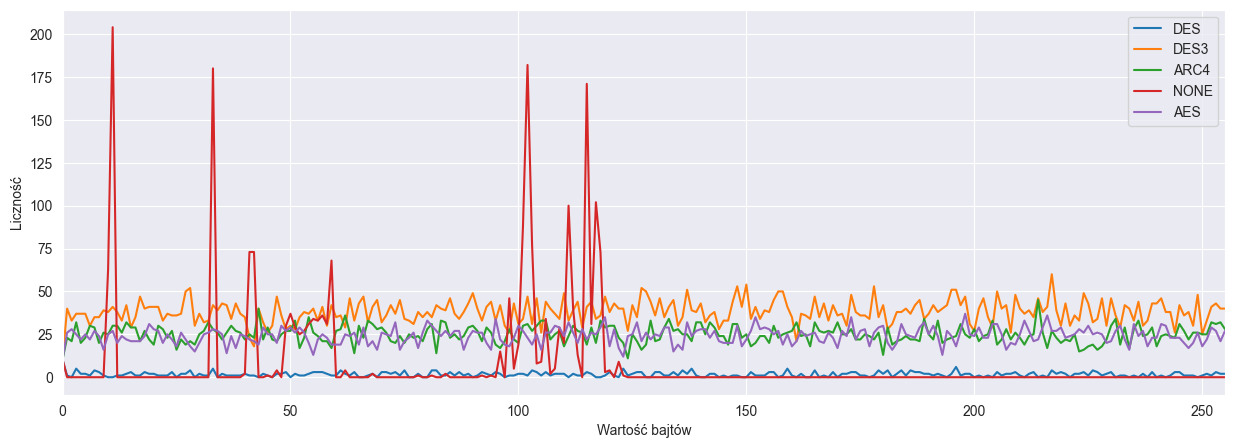

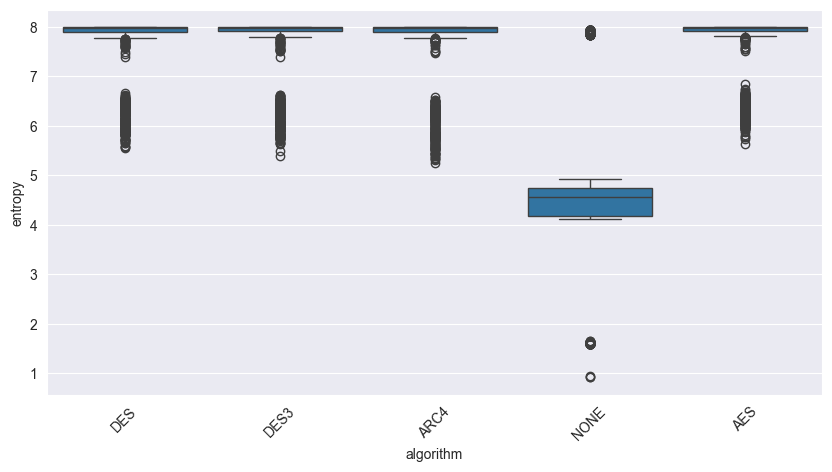

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_cbc_1000_1key["algorithm"].unique()):
    subset = df_cbc_1000_1key[df_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików (1000 plików na format, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cbc_1000_1key["algorithm"], y=df_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików 1000 plików na format, jeden klucz szyfrujący")
plt.show()

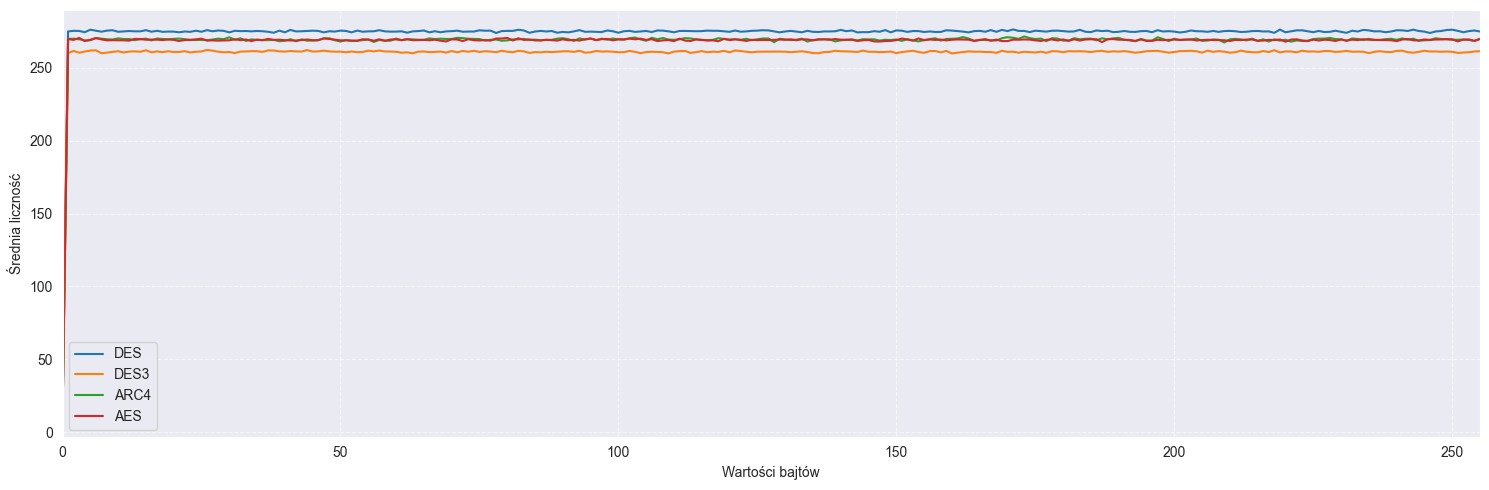

In [5]:
import matplotlib.pyplot as plt

algorithms = df_cbc_1000_1key["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_cbc_1000_1key[df_cbc_1000_1key["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Data frame with 1000 files *.bmp encrypted in ECB mode using 1 key - features


In [5]:
df_bmp_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,image_0243.bmp.enc,bmp_cbc,7.999038,127.408600,5454.910244,73.857364,-0.001586,-1.197367,20077642,10.284443,...,763,762,740,720,735,738,707,749,738,DES
1,image_0253.bmp.enc,bmp_cbc,7.999439,127.476023,5466.517216,73.935899,0.002077,-1.200748,30755187,10.277638,...,1142,1163,1180,1159,1156,1151,1164,1198,1145,DES
2,image_0382.bmp.enc,bmp_cbc,7.996561,127.184318,5471.224222,73.967724,0.000391,-1.200845,6169033,10.273625,...,223,225,202,254,210,239,208,249,201,DES
3,image_0392.bmp.enc,bmp_cbc,7.997959,127.460323,5486.493985,74.070871,0.003178,-1.204398,10035192,10.252383,...,425,370,389,370,389,364,384,403,384,DES
4,image_0298.bmp.enc,bmp_cbc,7.998871,127.218914,5468.946403,73.952325,0.003460,-1.205020,17395455,10.273994,...,674,615,636,641,633,673,611,621,569,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0199.bmp.enc,bmp_cbc,7.996713,127.641806,5466.684179,73.937028,-0.002875,-1.202383,5932680,10.244568,...,200,199,235,232,241,233,204,228,220,AES
996,image_0093.bmp.enc,bmp_cbc,7.999135,127.626395,5463.937864,73.918454,-0.001701,-1.198831,26218634,10.281043,...,985,995,1009,1012,998,990,963,941,967,AES
997,image_0083.bmp.enc,bmp_cbc,7.998933,127.469611,5482.431137,74.043441,0.002666,-1.204016,17013188,10.284543,...,639,585,619,630,640,663,659,667,673,AES
998,image_0152.bmp.enc,bmp_cbc,7.998955,127.674679,5448.662028,73.815053,-0.005070,-1.199387,18419094,10.272160,...,640,677,660,700,706,675,633,643,680,AES


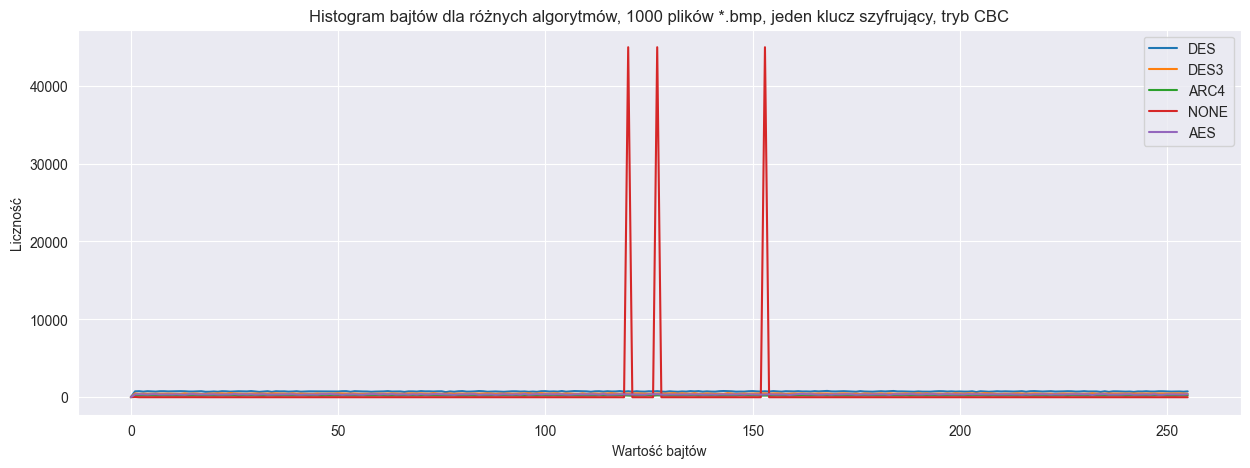

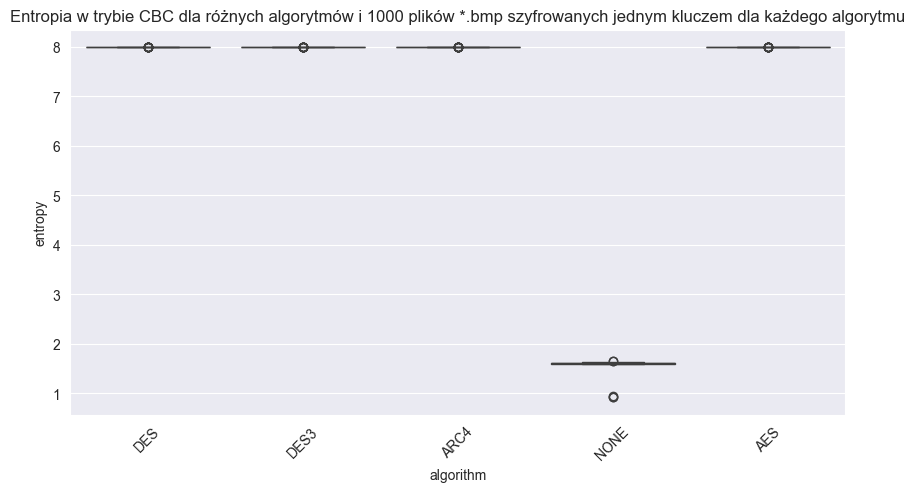

In [6]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1000_1key["algorithm"].unique()):
    subset = df_bmp_cbc_1000_1key[df_bmp_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1000_1key["algorithm"], y=df_bmp_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.bmp szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [7]:
df_csv_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_csv_cbc.csv'))
df_csv_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0226.csv.enc,csv_cbc,6.673752,122.794118,5082.663495,71.292801,0.107870,-1.170526,14992,10.499300,...,0,0,0,0,0,2,1,0,0,DES
1,file0236.csv.enc,csv_cbc,6.308566,119.442308,4709.573595,68.626333,0.287149,-0.958147,10756,10.169714,...,1,1,0,0,0,0,0,0,0,DES
2,file0385.csv.enc,csv_cbc,6.504685,121.933333,4617.345556,67.951053,0.110530,-1.124080,13730,10.696573,...,1,1,0,1,0,0,0,1,0,DES
3,file0395.csv.enc,csv_cbc,6.256736,125.104167,5882.968316,76.700511,-0.080443,-1.301452,9794,10.100536,...,0,1,0,0,0,0,1,0,1,DES
4,file0244.csv.enc,csv_cbc,5.909184,131.525000,4695.124375,68.520978,-0.154965,-1.003477,7708,9.815804,...,1,0,0,0,0,0,0,0,1,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0145.csv.enc,csv_cbc,6.744102,115.679688,5174.670837,71.935185,0.118517,-1.158126,13883,10.414458,...,0,0,1,0,0,0,1,0,0,AES
996,file0094.csv.enc,csv_cbc,6.585785,127.343750,5292.522461,72.749725,0.007688,-1.142592,15226,10.906563,...,0,0,1,0,1,1,0,1,0,AES
997,file0084.csv.enc,csv_cbc,6.417740,136.187500,6060.527344,77.849389,-0.213043,-1.195432,12744,9.978101,...,3,0,0,1,1,0,0,1,1,AES
998,file0137.csv.enc,csv_cbc,6.848643,130.048611,5799.240693,76.152746,-0.037372,-1.211535,14959,10.192249,...,0,2,0,0,0,1,0,1,1,AES


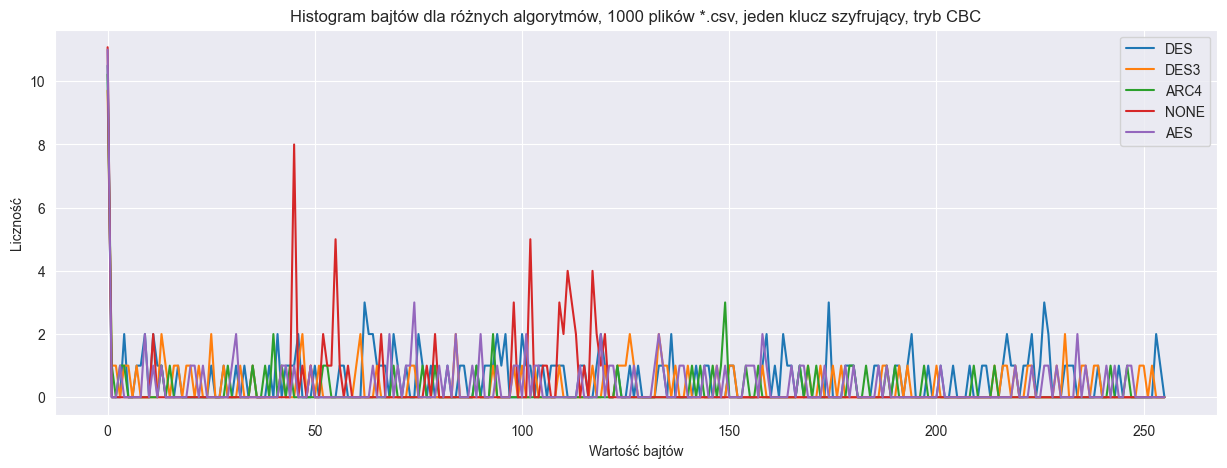

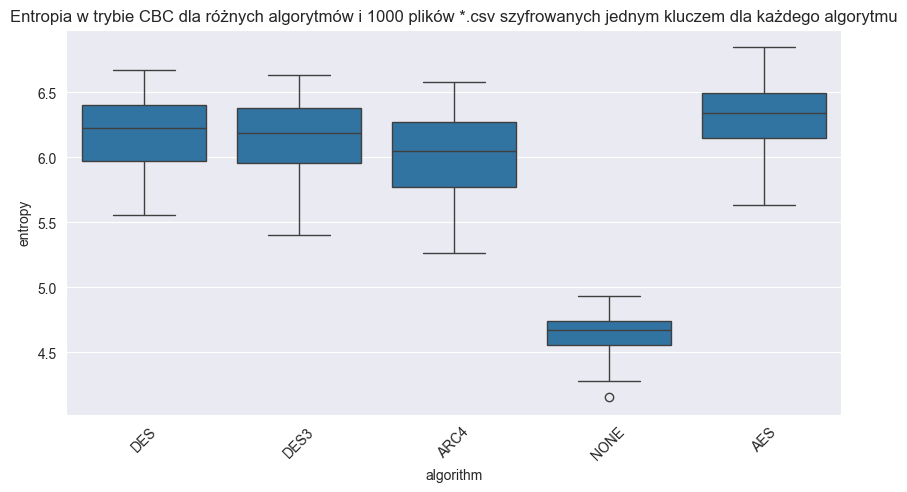

In [8]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1000_1key["algorithm"].unique()):
    subset = df_csv_cbc_1000_1key[df_csv_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1000_1key["algorithm"], y=df_csv_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.csv szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [9]:
df_html_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_html_cbc.csv'))
df_html_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0320.html.enc,html_cbc,7.975940,127.805312,5487.441560,74.077267,0.008010,-1.207772,776102,10.308109,...,26,38,29,37,27,18,27,35,32,DES
1,file0321.html.enc,html_cbc,7.974249,127.603992,5380.539343,73.352160,-0.007584,-1.192675,809398,10.309025,...,26,40,36,30,27,25,11,22,31,DES
2,file0228.html.enc,html_cbc,7.967864,127.004893,5340.130500,73.076197,0.018978,-1.169693,673213,10.307864,...,21,27,37,22,24,22,21,23,21,DES
3,file0229.html.enc,html_cbc,7.955560,128.615987,5471.849450,73.971950,-0.031463,-1.207066,447941,10.307661,...,18,15,19,20,22,14,13,19,13,DES
4,file0369.html.enc,html_cbc,7.978549,125.903919,5385.722013,73.387479,0.029790,-1.190847,1015359,10.314415,...,32,26,38,43,40,32,34,40,35,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0154.html.enc,html_cbc,7.981844,126.961442,5537.573994,74.414878,0.008437,-1.226015,1091779,10.245914,...,42,41,38,39,51,44,45,36,35,AES
996,file0122.html.enc,html_cbc,7.967667,126.850156,5453.278328,73.846316,0.005840,-1.206077,683523,10.334431,...,15,27,30,23,24,24,22,26,15,AES
997,file0123.html.enc,html_cbc,7.932962,128.437171,5438.107895,73.743528,-0.007747,-1.197685,319949,10.258966,...,14,4,15,15,12,19,15,11,9,AES
998,file0063.html.enc,html_cbc,7.949752,127.102806,5502.125400,74.176313,-0.007429,-1.197921,407711,10.198427,...,14,15,8,19,14,21,14,13,16,AES


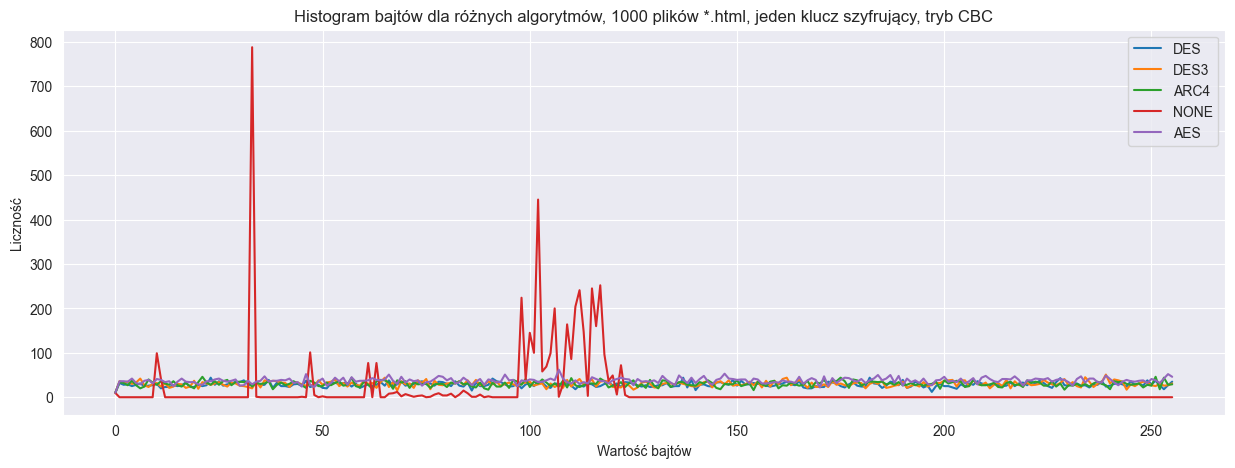

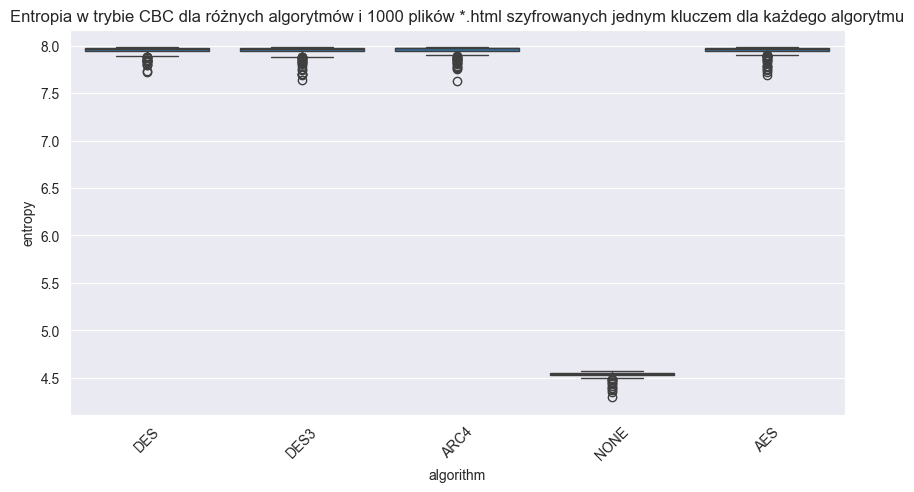

In [10]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_cbc_1000_1key["algorithm"].unique()):
    subset = df_html_cbc_1000_1key[df_html_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_cbc_1000_1key["algorithm"], y=df_html_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.html szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [11]:
df_pyth_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.458197,125.656250,5315.538086,72.907737,0.001568,-1.185772,43181,10.188252,...,1,0,1,2,1,3,2,2,0,DES
1,file0280.py.enc,pyth_cbc,7.907674,126.913587,5388.075685,73.403513,0.036156,-1.202440,193351,10.250954,...,13,8,7,6,7,4,9,4,4,DES
2,file0292.py.enc,pyth_cbc,7.971706,127.544835,5484.838611,74.059696,-0.005837,-1.211416,671401,10.313534,...,30,25,25,29,15,19,22,23,17,DES
3,file0392.py.enc,pyth_cbc,7.979720,128.113233,5355.573987,73.181787,-0.025887,-1.171720,1021821,10.269998,...,34,46,38,35,42,35,33,36,36,DES
4,file0302.py.enc,pyth_cbc,7.965502,128.098099,5443.436372,73.779647,0.000471,-1.211359,520845,10.263962,...,25,19,9,23,11,16,30,18,20,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0075.py.enc,pyth_cbc,7.978026,127.382423,5528.309931,74.352605,-0.001937,-1.211599,871054,10.212388,...,36,26,33,32,36,27,31,48,28,AES
996,file0108.py.enc,pyth_cbc,7.958662,128.395442,5410.169049,73.553851,-0.045531,-1.196230,447657,10.255855,...,16,12,14,17,13,16,17,14,14,AES
997,file0008.py.enc,pyth_cbc,7.976455,127.770209,5420.897544,73.626745,-0.008144,-1.187972,787709,10.267494,...,34,26,19,37,34,24,24,30,26,AES
998,file0116.py.enc,pyth_cbc,7.897899,129.393617,5556.808718,74.544005,-0.073008,-1.226025,242558,10.369033,...,11,5,6,6,4,4,8,11,5,AES


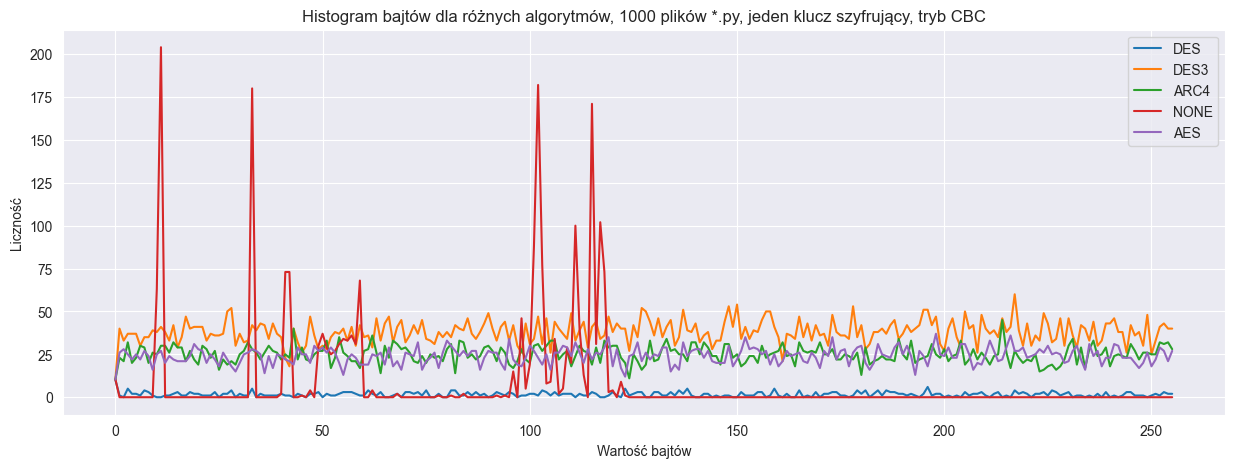

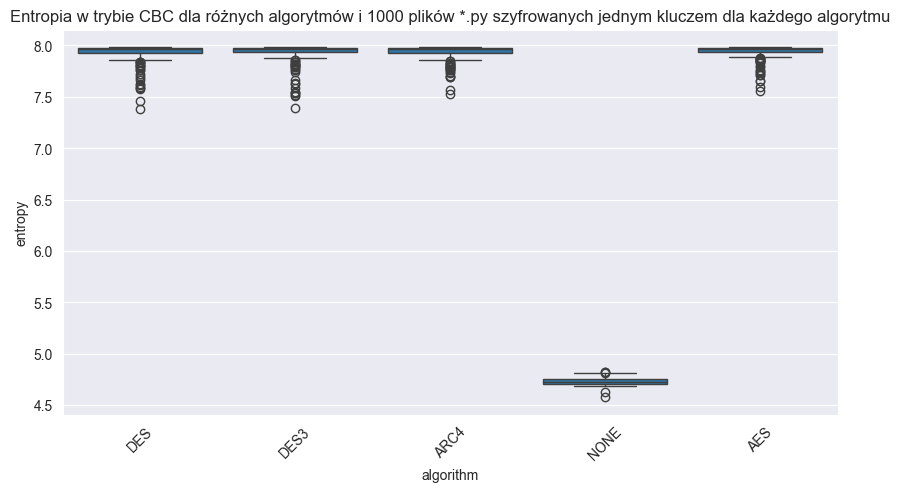

In [12]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1000_1key["algorithm"].unique()):
    subset = df_pyth_cbc_1000_1key[df_pyth_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1000_1key["algorithm"], y=df_pyth_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.py szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [13]:
df_txt_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_txt_cbc.csv'))
df_txt_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_cbc,7.939068,127.808882,5470.612487,73.963589,0.000861,-1.190888,318453,10.234954,...,11,10,14,16,20,5,14,12,13,DES
1,file0288.txt.enc,txt_cbc,7.976908,127.700697,5432.367340,73.704595,0.007062,-1.196390,851286,10.294989,...,29,37,27,29,28,28,35,34,39,DES
2,file0221.txt.enc,txt_cbc,7.971322,126.348313,5573.261560,74.654280,0.014414,-1.222133,759477,10.247740,...,29,20,26,29,35,23,26,25,23,DES
3,file0359.txt.enc,txt_cbc,7.969531,126.704545,5458.946628,73.884685,0.006501,-1.192221,615428,10.216682,...,18,26,22,25,23,18,21,17,29,DES
4,file0231.txt.enc,txt_cbc,7.916444,127.883363,5552.878561,74.517639,-0.010005,-1.223669,237547,10.225172,...,3,10,12,9,11,7,7,13,5,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0048.txt.enc,txt_cbc,7.879118,126.976471,5228.027388,72.305099,0.004497,-1.164114,146038,10.362475,...,5,12,3,5,8,3,3,1,3,AES
996,file0120.txt.enc,txt_cbc,7.834713,126.321573,5367.990341,73.266570,0.010742,-1.181832,102881,10.183844,...,3,1,4,1,4,2,4,6,5,AES
997,file0058.txt.enc,txt_cbc,7.934360,128.759943,5432.326606,73.704319,-0.024947,-1.189706,302834,10.370173,...,14,6,11,13,11,9,11,11,17,AES
998,file0189.txt.enc,txt_cbc,7.962662,127.998601,5509.247200,74.224303,-0.014767,-1.199197,449508,10.238618,...,15,22,15,18,13,26,20,21,21,AES


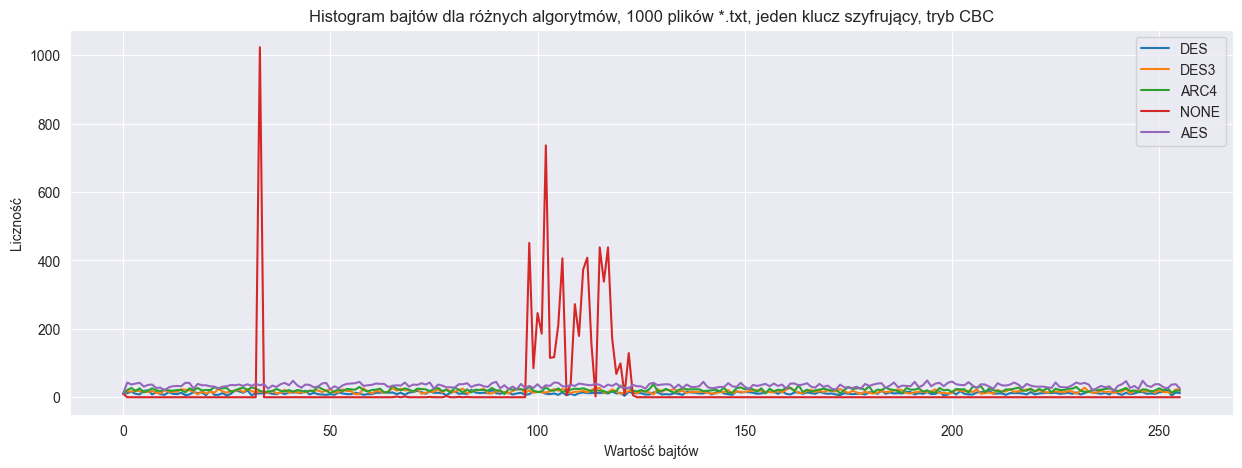

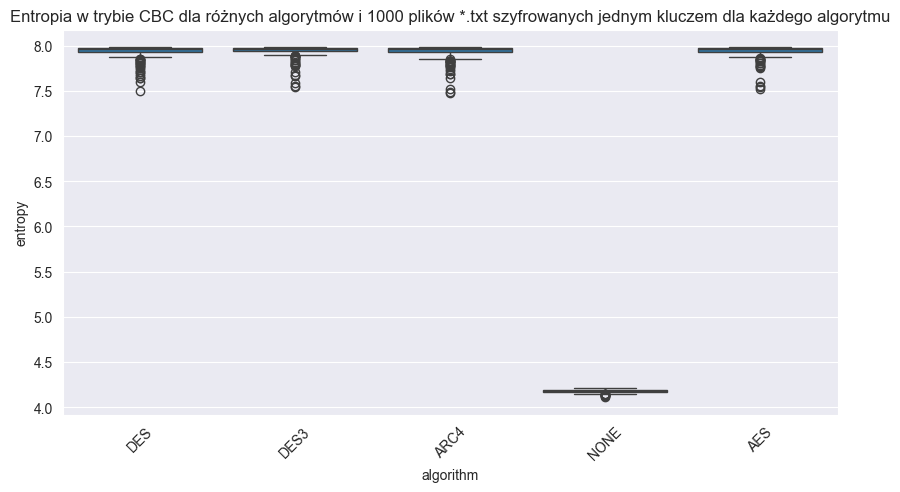

In [14]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1000_1key["algorithm"].unique()):
    subset = df_txt_cbc_1000_1key[df_txt_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1000_1key["algorithm"], y=df_txt_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.txt szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [15]:
df_wav_cbc_1000_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_1key_csv/features_wav_cbc.csv'))
df_wav_cbc_1000_1key

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0214.wav.enc,wav_cbc,7.999511,127.281084,5467.084532,73.939736,0.003887,-1.200321,37242158,10.273506,...,1414,1389,1302,1328,1332,1346,1408,1436,1380,DES
1,file0204.wav.enc,wav_cbc,7.997781,127.546365,5445.885949,73.796246,0.000914,-1.199430,9340704,10.287686,...,370,324,368,366,351,324,342,323,338,DES
2,file0276.wav.enc,wav_cbc,7.999541,127.217764,5470.390224,73.962086,0.004351,-1.200929,46530758,10.271248,...,1715,1736,1778,1745,1644,1756,1794,1678,1705,DES
3,file0266.wav.enc,wav_cbc,7.999045,127.351844,5454.245323,73.852863,0.002825,-1.199145,18597531,10.266193,...,656,665,683,667,674,680,729,717,715,DES
4,file0353.wav.enc,wav_cbc,7.998099,127.791674,5473.437316,73.982683,-0.002607,-1.204809,9283450,10.256108,...,376,325,363,357,384,325,358,318,353,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0052.wav.enc,wav_cbc,7.999404,127.670694,5464.885928,73.924867,0.000553,-1.201147,27893262,10.265867,...,1062,1040,1020,1044,1015,1080,1051,1071,1091,AES
996,file0167.wav.enc,wav_cbc,7.998913,127.367389,5449.531988,73.820945,0.001166,-1.194662,18613601,10.270395,...,684,664,644,721,682,687,680,745,678,AES
997,file0177.wav.enc,wav_cbc,7.999333,127.451155,5466.579308,73.936319,-0.001449,-1.202260,27910942,10.269120,...,985,1011,1062,1030,1037,1016,1034,1044,977,AES
998,file0105.wav.enc,wav_cbc,7.998894,127.554776,5440.439753,73.759337,0.000647,-1.194097,18593220,10.264771,...,669,690,716,721,717,694,674,689,673,AES


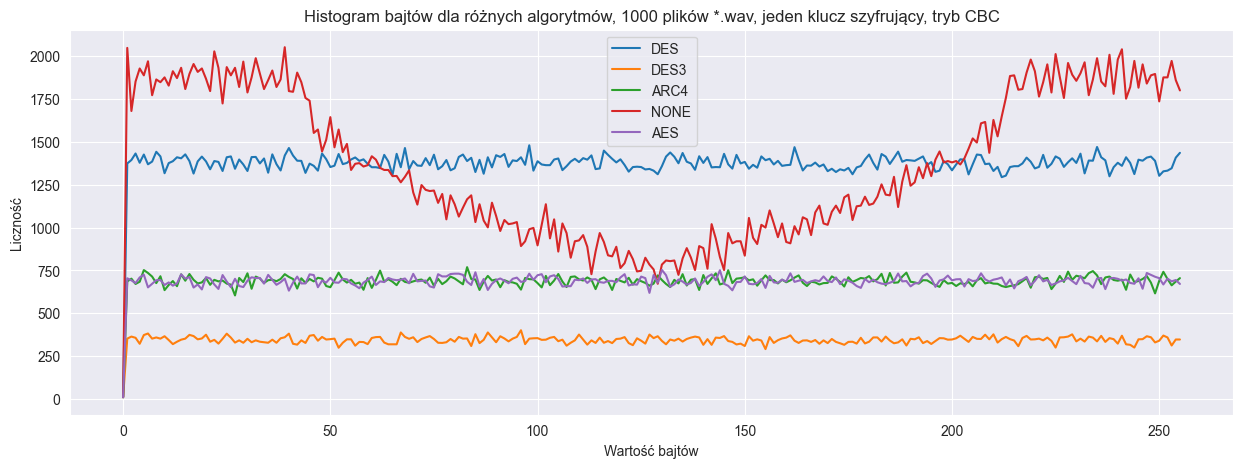

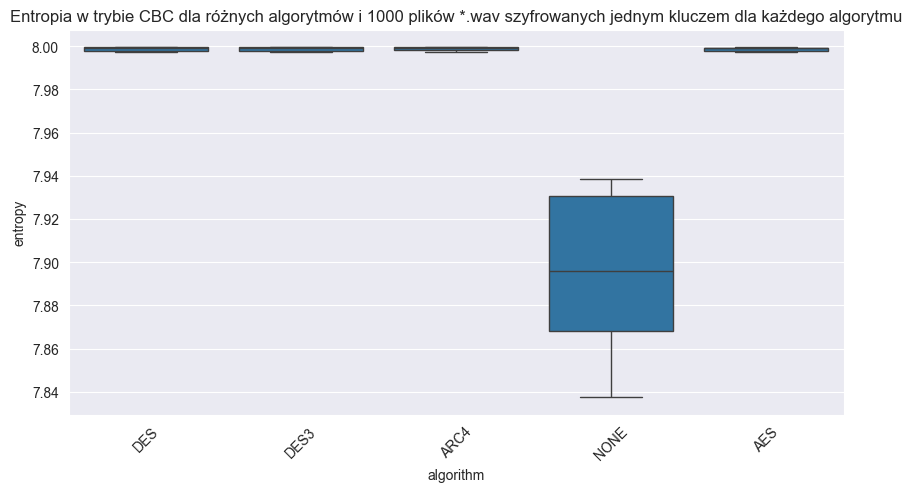

In [16]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1000_1key["algorithm"].unique()):
    subset = df_wav_cbc_1000_1key[df_wav_cbc_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1000_1key["algorithm"], y=df_wav_cbc_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.wav szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (3 keys per algorithm)

In [6]:
df_all_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_all.csv'))
df_all_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.454081,126.033654,5639.748867,75.098261,0.063670,-1.257391,44000,10.284417,...,1,3,0,2,2,1,2,0,3,DES
1,file0280.py.enc,pyth_cbc,7.910468,126.864130,5355.358713,73.180316,0.007863,-1.157829,190954,10.187215,...,6,12,5,2,7,9,9,10,11,DES
2,file0292.py.enc,pyth_cbc,7.970668,129.598067,5337.392791,73.057462,-0.039944,-1.191557,665103,10.265047,...,22,21,26,19,31,21,28,21,21,DES
3,file0392.py.enc,pyth_cbc,7.977258,127.814719,5501.092116,74.169348,-0.006067,-1.216917,1024321,10.282553,...,32,37,32,41,33,42,40,32,42,DES
4,file0302.py.enc,pyth_cbc,7.960300,128.923948,5599.631757,74.830687,-0.025540,-1.226165,521056,10.266040,...,24,15,15,24,11,24,21,23,16,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996694,127.215645,5445.179863,73.791462,0.007323,-1.192745,5954208,10.263139,...,209,232,246,189,213,219,200,236,228,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999316,127.490994,5461.161436,73.899671,-0.000220,-1.199276,26185766,10.274597,...,948,994,945,973,977,1030,967,922,982,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998846,127.097900,5466.979517,73.939026,0.007192,-1.203100,17020385,10.286719,...,625,643,596,586,609,645,621,649,587,AES
5998,image_0152.bmp.enc,bmp_cbc,7.999056,127.389992,5474.344589,73.988814,0.004690,-1.202521,18413683,10.270651,...,744,705,704,690,693,687,701,701,715,AES


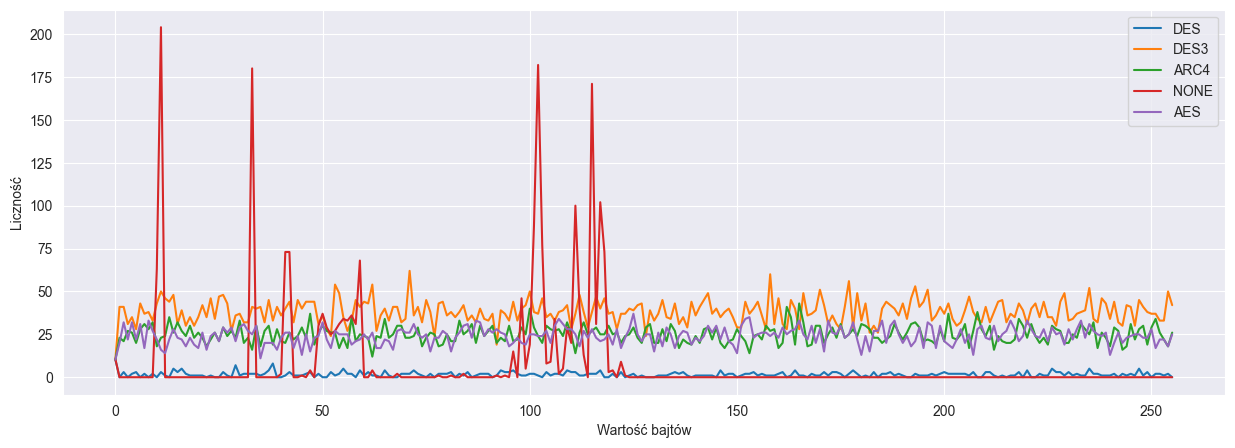

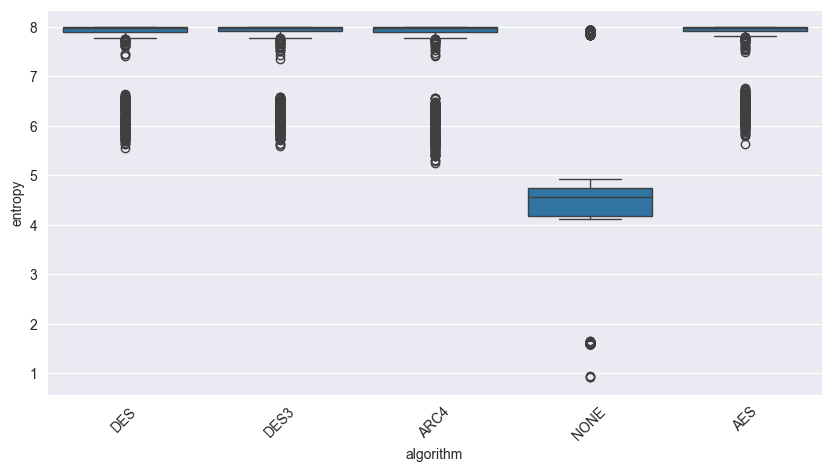

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_cbc_1000_3keys["algorithm"].unique()):
    subset = df_all_cbc_1000_3keys[df_all_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_cbc_1000_3keys["algorithm"], y=df_all_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, trzy klucze szyfrujące na algorytm")
plt.show()

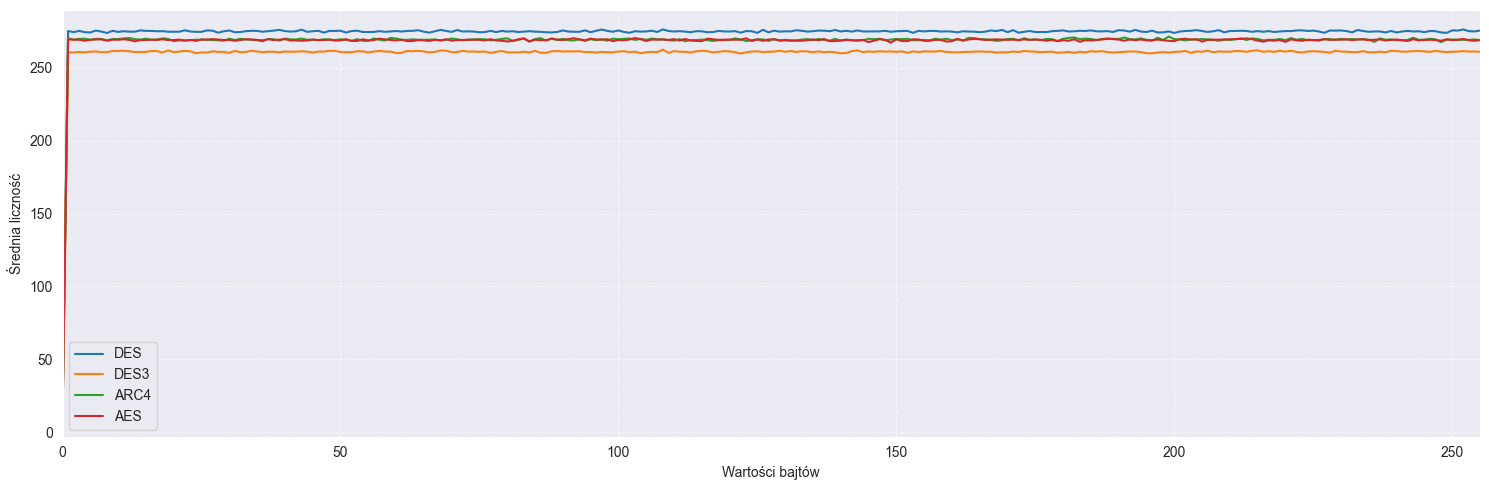

In [9]:
import matplotlib.pyplot as plt

algorithms = df_all_cbc_1000_3keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_cbc_1000_3keys[df_all_cbc_1000_3keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_bmp_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,image_0243.bmp.enc,bmp_cbc,7.999082,127.335363,5481.772815,74.038995,0.003518,-1.203709,20092952,10.288364,...,745,697,742,729,755,764,736,797,744,DES
1,image_0253.bmp.enc,bmp_cbc,7.999367,127.628857,5463.576073,73.916007,-0.007242,-1.202892,30750148,10.276796,...,1070,1162,1120,1116,1149,1102,1087,1109,1099,DES
2,image_0382.bmp.enc,bmp_cbc,7.997115,127.900732,5471.640912,73.970541,-0.010378,-1.203455,6172228,10.276285,...,262,192,232,239,213,232,251,231,237,DES
3,image_0392.bmp.enc,bmp_cbc,7.998170,127.231597,5448.437009,73.813529,0.007561,-1.193104,10060973,10.265544,...,360,397,382,383,347,383,367,410,384,DES
4,image_0298.bmp.enc,bmp_cbc,7.998998,127.565765,5460.088915,73.892414,0.001085,-1.202684,17417632,10.280541,...,617,683,652,612,642,635,643,623,615,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0199.bmp.enc,bmp_cbc,7.996694,127.215645,5445.179863,73.791462,0.007323,-1.192745,5954208,10.263139,...,209,232,246,189,213,219,200,236,228,AES
996,image_0093.bmp.enc,bmp_cbc,7.999316,127.490994,5461.161436,73.899671,-0.000220,-1.199276,26185766,10.274597,...,948,994,945,973,977,1030,967,922,982,AES
997,image_0083.bmp.enc,bmp_cbc,7.998846,127.097900,5466.979517,73.939026,0.007192,-1.203100,17020385,10.286719,...,625,643,596,586,609,645,621,649,587,AES
998,image_0152.bmp.enc,bmp_cbc,7.999056,127.389992,5474.344589,73.988814,0.004690,-1.202521,18413683,10.270651,...,744,705,704,690,693,687,701,701,715,AES


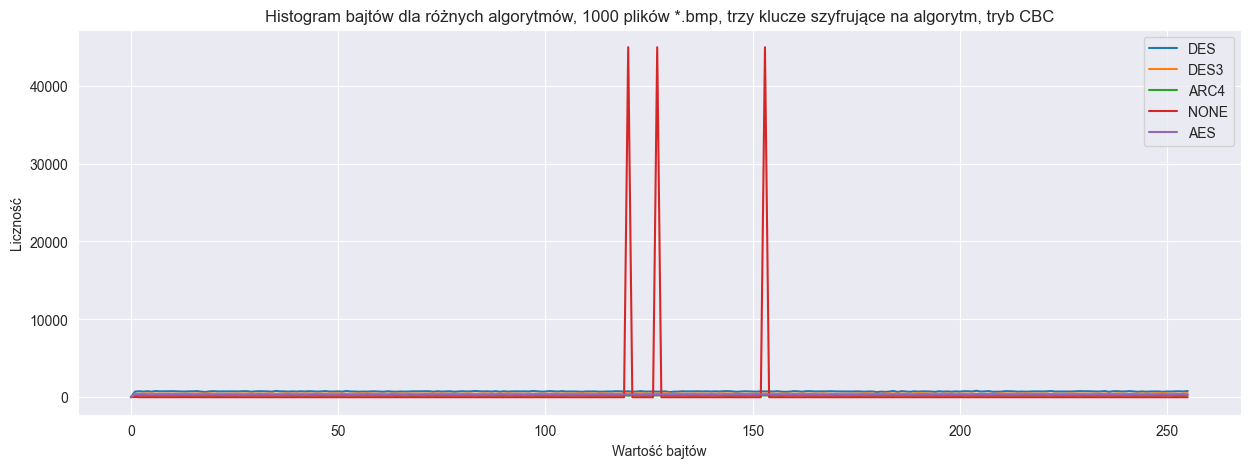

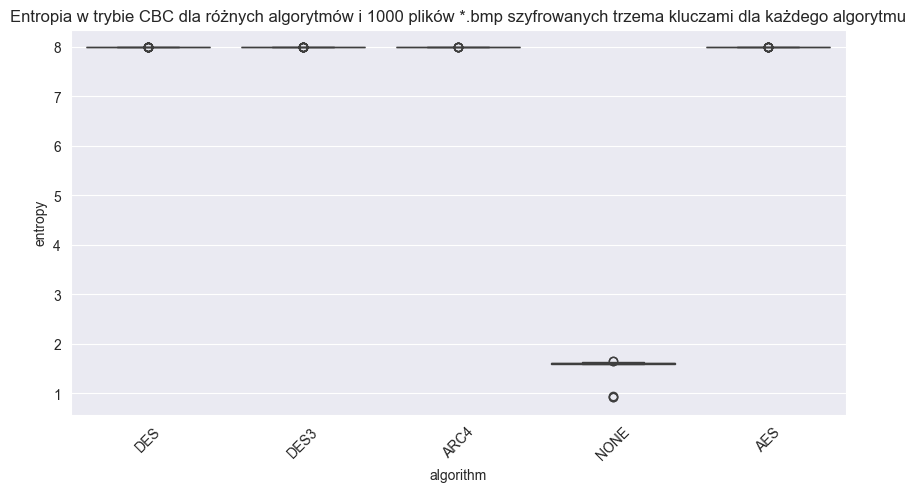

In [20]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1000_3keys["algorithm"].unique()):
    subset = df_bmp_cbc_1000_3keys[df_bmp_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1000_3keys["algorithm"], y=df_bmp_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.bmp szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [21]:
df_csv_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_csv_cbc.csv'))
df_csv_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0226.csv.enc,csv_cbc,6.565260,125.691176,6207.139922,78.785404,0.056750,-1.278147,13152,9.833915,...,0,0,0,1,1,1,2,0,0,DES
1,file0236.csv.enc,csv_cbc,6.301307,133.490385,5706.096061,75.538706,0.008735,-1.248432,11353,10.448132,...,2,1,0,1,1,0,2,0,1,DES
2,file0385.csv.enc,csv_cbc,6.471352,126.541667,5298.331597,72.789639,-0.090646,-1.118910,13463,10.592057,...,1,0,0,0,0,0,0,1,0,DES
3,file0395.csv.enc,csv_cbc,6.347932,129.666667,5812.013889,76.236565,-0.049922,-1.220639,10636,10.525762,...,0,0,0,0,1,1,1,0,0,DES
4,file0244.csv.enc,csv_cbc,6.046928,123.575000,5488.194375,74.082349,0.107654,-1.346536,8494,10.304125,...,0,0,0,0,0,1,0,0,0,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0145.csv.enc,csv_cbc,6.445160,132.703125,5372.880615,73.299936,0.008853,-1.227366,13952,10.440307,...,1,0,1,0,1,1,0,0,4,AES
996,file0094.csv.enc,csv_cbc,6.523285,124.914062,5441.672302,73.767691,-0.022433,-1.262849,11929,9.653772,...,0,0,0,0,2,1,0,0,1,AES
997,file0084.csv.enc,csv_cbc,6.492035,138.429688,5648.104431,75.153872,-0.137258,-1.231848,15473,10.994672,...,2,1,0,1,0,0,0,1,0,AES
998,file0137.csv.enc,csv_cbc,6.659440,127.770833,5235.371094,72.355864,0.083569,-1.204853,15341,10.321566,...,0,2,0,2,0,0,0,1,0,AES


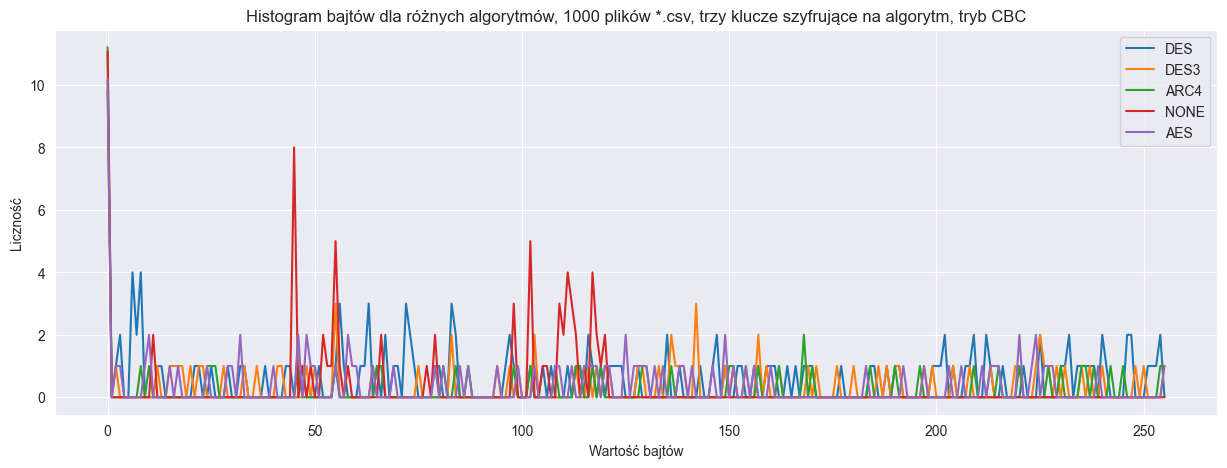

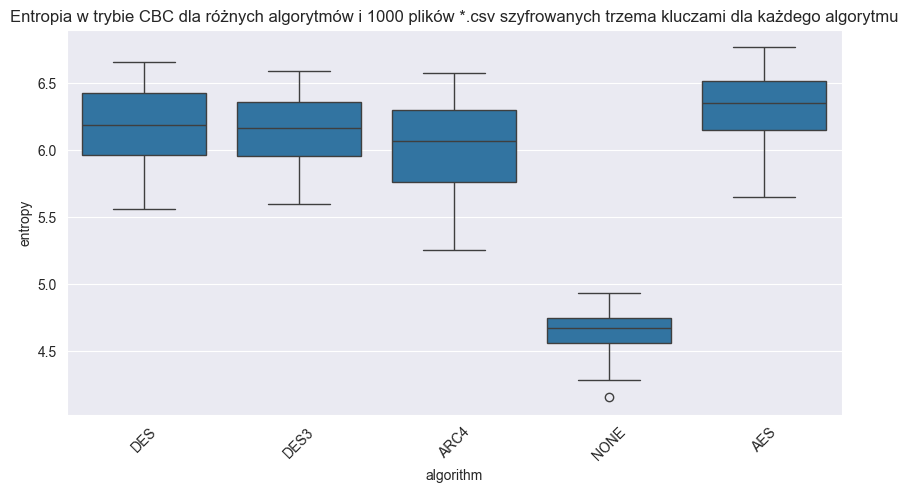

In [22]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1000_3keys["algorithm"].unique()):
    subset = df_csv_cbc_1000_3keys[df_csv_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1000_3keys["algorithm"], y=df_csv_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.csv szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [23]:
df_html_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_html_cbc.csv'))
df_html_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0320.html.enc,html_cbc,7.972589,126.870893,5406.436918,73.528477,0.014428,-1.189340,772807,10.286204,...,29,27,23,26,34,30,27,33,25,DES
1,file0321.html.enc,html_cbc,7.978572,127.306197,5528.940119,74.356843,0.014826,-1.206256,811850,10.324628,...,28,36,22,40,26,40,27,28,32,DES
2,file0228.html.enc,html_cbc,7.971540,126.853378,5562.592927,74.582792,0.009890,-1.213716,653751,10.157775,...,24,29,21,22,26,13,29,23,32,DES
3,file0229.html.enc,html_cbc,7.963309,128.791271,5485.830246,74.066391,-0.012523,-1.193306,438548,10.199016,...,17,11,19,13,12,13,26,19,16,DES
4,file0369.html.enc,html_cbc,7.981226,126.514355,5484.687556,74.058676,0.016428,-1.210595,997451,10.223052,...,39,38,41,33,41,39,37,33,32,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0154.html.enc,html_cbc,7.983892,128.396346,5474.321371,73.988657,-0.001913,-1.207561,1105072,10.308100,...,36,38,43,38,45,41,45,43,41,AES
996,file0122.html.enc,html_cbc,7.969829,128.285156,5432.513530,73.705587,-0.007116,-1.188958,670943,10.238889,...,21,28,23,23,25,27,23,24,29,AES
997,file0123.html.enc,html_cbc,7.930861,128.277303,5503.820143,74.187736,-0.012911,-1.202422,325831,10.352838,...,16,12,15,12,10,14,8,14,11,AES
998,file0063.html.enc,html_cbc,7.954679,129.309439,5480.841237,74.032704,-0.046627,-1.189604,415395,10.294081,...,13,16,19,19,16,11,17,13,27,AES


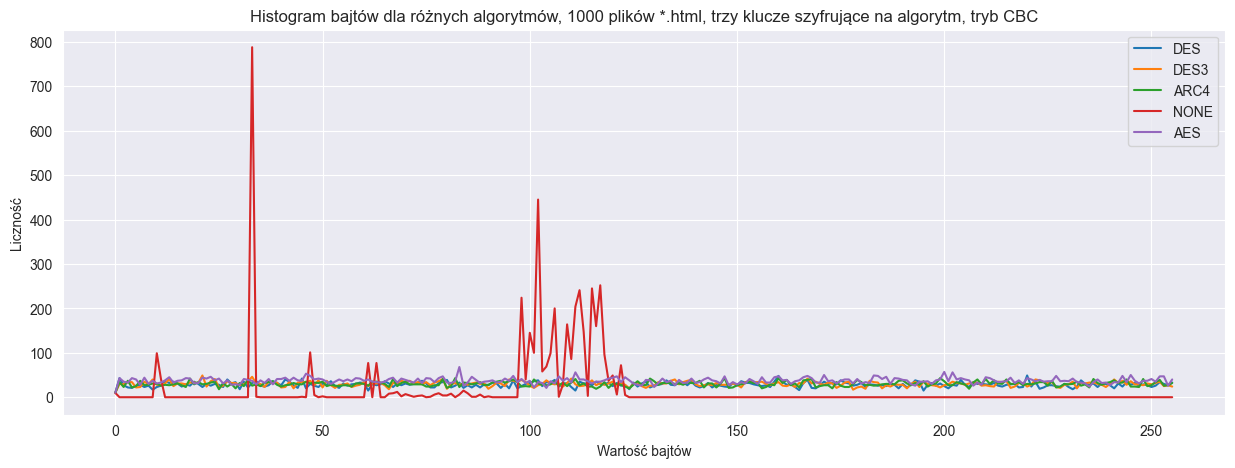

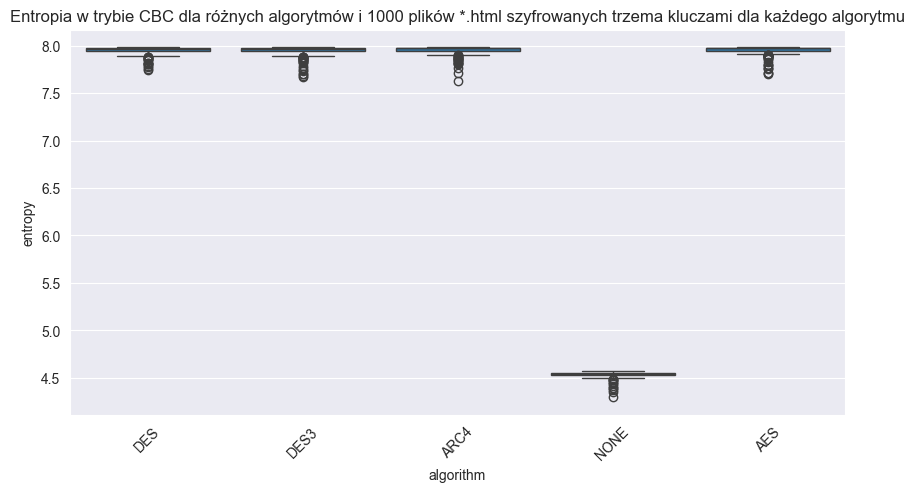

In [24]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_cbc_1000_3keys["algorithm"].unique()):
    subset = df_html_cbc_1000_3keys[df_html_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_cbc_1000_3keys["algorithm"], y=df_html_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.html szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [25]:
df_pyth_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.454081,126.033654,5639.748867,75.098261,0.063670,-1.257391,44000,10.284417,...,1,3,0,2,2,1,2,0,3,DES
1,file0280.py.enc,pyth_cbc,7.910468,126.864130,5355.358713,73.180316,0.007863,-1.157829,190954,10.187215,...,6,12,5,2,7,9,9,10,11,DES
2,file0292.py.enc,pyth_cbc,7.970668,129.598067,5337.392791,73.057462,-0.039944,-1.191557,665103,10.265047,...,22,21,26,19,31,21,28,21,21,DES
3,file0392.py.enc,pyth_cbc,7.977258,127.814719,5501.092116,74.169348,-0.006067,-1.216917,1024321,10.282553,...,32,37,32,41,33,42,40,32,42,DES
4,file0302.py.enc,pyth_cbc,7.960300,128.923948,5599.631757,74.830687,-0.025540,-1.226165,521056,10.266040,...,24,15,15,24,11,24,21,23,16,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0075.py.enc,pyth_cbc,7.980037,127.982639,5493.312079,74.116881,-0.016031,-1.207133,872785,10.222530,...,30,35,33,30,41,28,35,35,16,AES
996,file0108.py.enc,pyth_cbc,7.949328,124.920818,5443.374134,73.779226,0.057011,-1.202575,453049,10.317436,...,19,10,18,15,18,17,19,16,17,AES
997,file0008.py.enc,pyth_cbc,7.974765,128.484877,5411.326056,73.561716,0.003329,-1.201717,788465,10.272420,...,44,24,36,32,30,30,35,23,32,AES
998,file0116.py.enc,pyth_cbc,7.926243,125.213652,5284.876338,72.697155,0.041042,-1.167779,240228,10.319111,...,11,7,6,8,7,6,4,8,8,AES


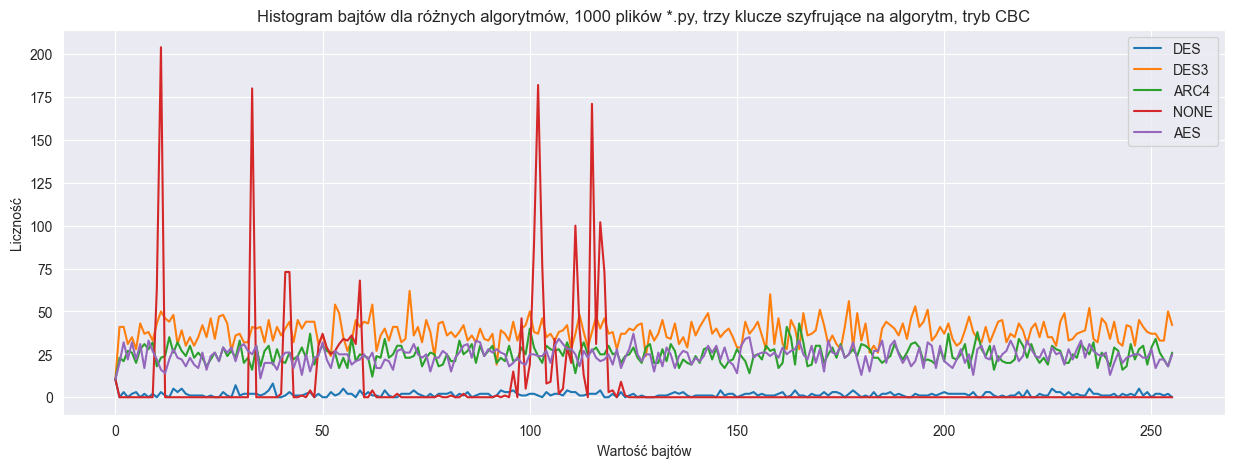

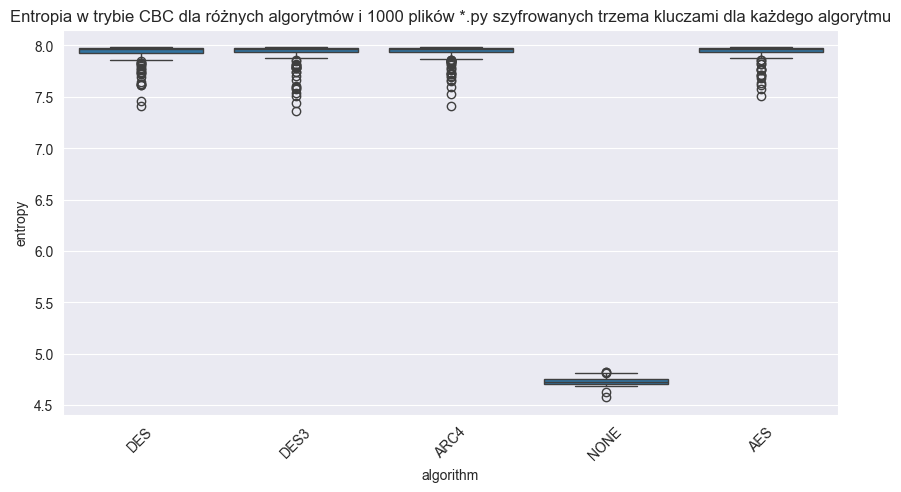

In [26]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1000_3keys["algorithm"].unique()):
    subset = df_pyth_cbc_1000_3keys[df_pyth_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1000_3keys["algorithm"], y=df_pyth_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.py szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [27]:
df_txt_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_txt_cbc.csv'))
df_txt_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_cbc,7.924542,131.256579,5454.042062,73.851487,-0.048868,-1.205334,314288,10.167803,...,7,12,17,19,16,14,17,13,12,DES
1,file0288.txt.enc,txt_cbc,7.976953,126.883715,5476.029556,74.000200,0.010397,-1.202874,840582,10.230060,...,37,31,22,22,38,34,36,23,25,DES
2,file0221.txt.enc,txt_cbc,7.974551,127.630393,5514.066792,74.256763,-0.013427,-1.204877,763711,10.276265,...,16,25,22,38,31,31,21,29,31,DES
3,file0359.txt.enc,txt_cbc,7.964981,126.778833,5539.634599,74.428722,0.006135,-1.219545,626702,10.309837,...,26,30,25,17,29,33,30,11,26,DES
4,file0231.txt.enc,txt_cbc,7.926756,129.210827,5368.435745,73.269610,-0.014742,-1.161765,230369,10.069499,...,9,9,16,14,6,10,13,9,7,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0048.txt.enc,txt_cbc,7.870642,128.766176,5545.862974,74.470551,-0.023915,-1.225493,143492,10.271749,...,3,6,8,4,5,5,4,5,2,AES
996,file0120.txt.enc,txt_cbc,7.815136,126.646169,5573.008876,74.652588,0.041994,-1.243357,104323,10.254965,...,2,2,2,5,3,2,4,9,5,AES
997,file0058.txt.enc,txt_cbc,7.932661,129.279119,5723.301354,75.652504,-0.026227,-1.239822,298832,10.301423,...,8,13,10,16,13,14,12,10,17,AES
998,file0189.txt.enc,txt_cbc,7.951233,128.702425,5610.686636,74.904517,-0.011112,-1.234395,457540,10.329687,...,21,12,15,18,18,21,22,21,14,AES


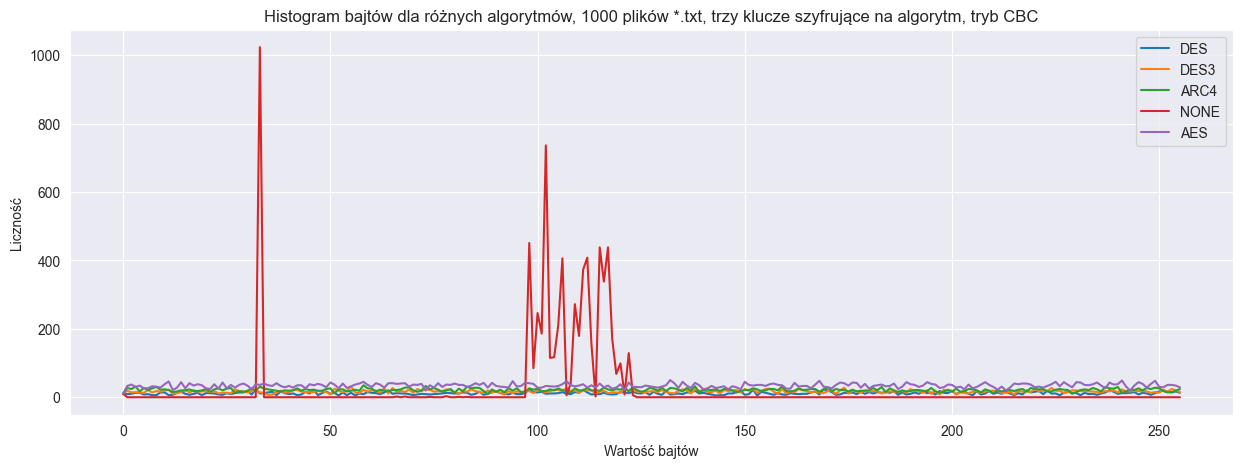

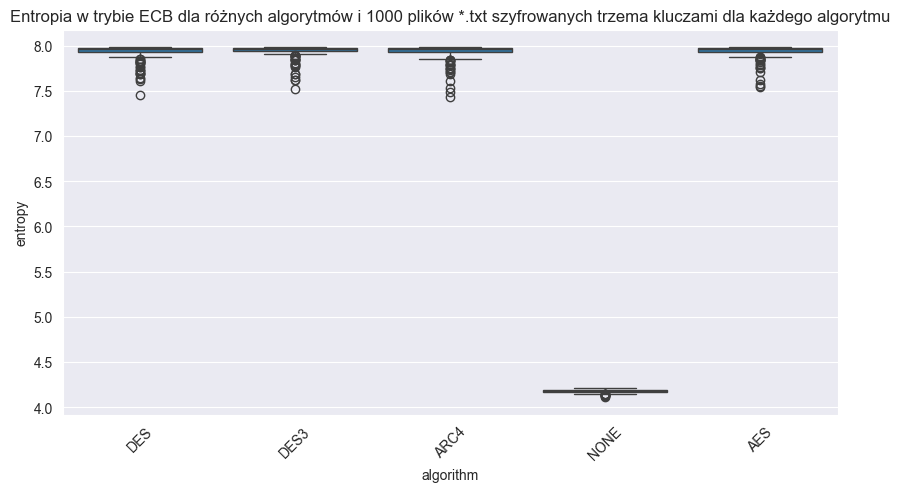

In [28]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1000_3keys["algorithm"].unique()):
    subset = df_txt_cbc_1000_3keys[df_txt_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1000_3keys["algorithm"], y=df_txt_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.txt szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [29]:
df_wav_cbc_1000_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1000/features_cbc_1000_3keys_csv/features_wav_cbc.csv'))
df_wav_cbc_1000_3keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0214.wav.enc,wav_cbc,7.999419,127.515017,5452.692085,73.842346,-0.003020,-1.196817,37178689,10.264748,...,1415,1426,1383,1326,1329,1376,1362,1322,1404,DES
1,file0204.wav.enc,wav_cbc,7.997714,127.846277,5477.362145,74.009203,-0.007916,-1.202126,9319871,10.276207,...,333,311,351,375,358,338,350,329,351,DES
2,file0276.wav.enc,wav_cbc,7.999534,127.413449,5457.154017,73.872553,-0.000228,-1.197893,46440952,10.261331,...,1708,1687,1621,1727,1724,1685,1706,1719,1690,DES
3,file0266.wav.enc,wav_cbc,7.998868,127.483208,5470.845674,73.965165,0.000929,-1.204195,18681199,10.289260,...,689,681,684,688,718,692,696,702,629,DES
4,file0353.wav.enc,wav_cbc,7.997777,127.417082,5474.819697,73.992025,-0.000601,-1.201550,9282876,10.255791,...,337,335,349,332,331,365,368,328,346,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0052.wav.enc,wav_cbc,7.999195,127.635065,5449.796736,73.822739,-0.002882,-1.198293,27894346,10.266067,...,1019,1040,1081,1049,998,1027,1003,976,1048,AES
996,file0167.wav.enc,wav_cbc,7.999073,127.155726,5486.797231,74.072918,0.003446,-1.204064,18663234,10.284079,...,710,716,687,677,767,654,669,693,707,AES
997,file0177.wav.enc,wav_cbc,7.999342,127.276837,5459.528990,73.888626,0.005978,-1.199917,27915063,10.269879,...,1000,1052,986,1075,1049,1040,1025,1067,970,AES
998,file0105.wav.enc,wav_cbc,7.999037,127.425747,5444.558205,73.787250,0.002415,-1.196024,18585687,10.262691,...,662,695,708,699,637,706,671,715,681,AES


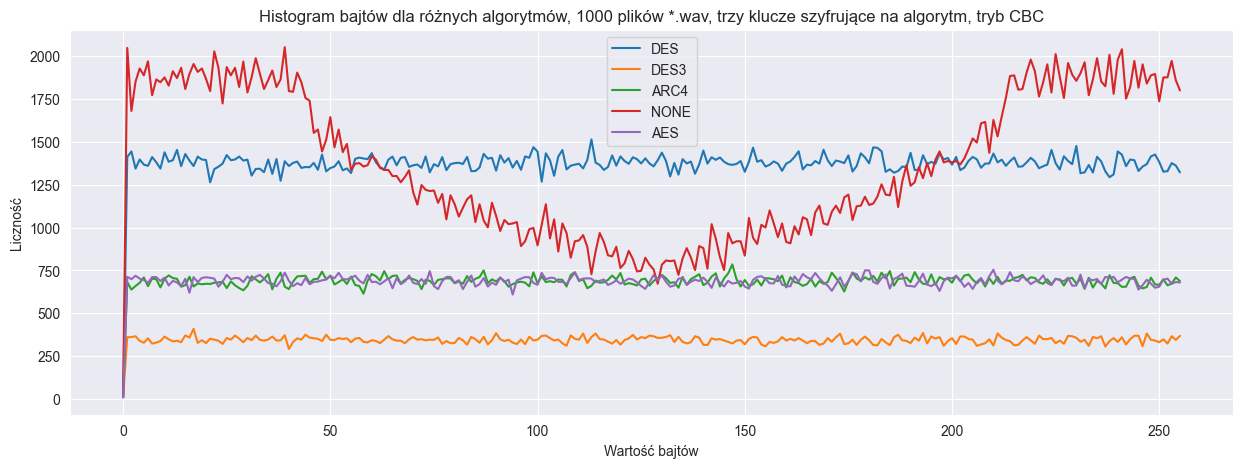

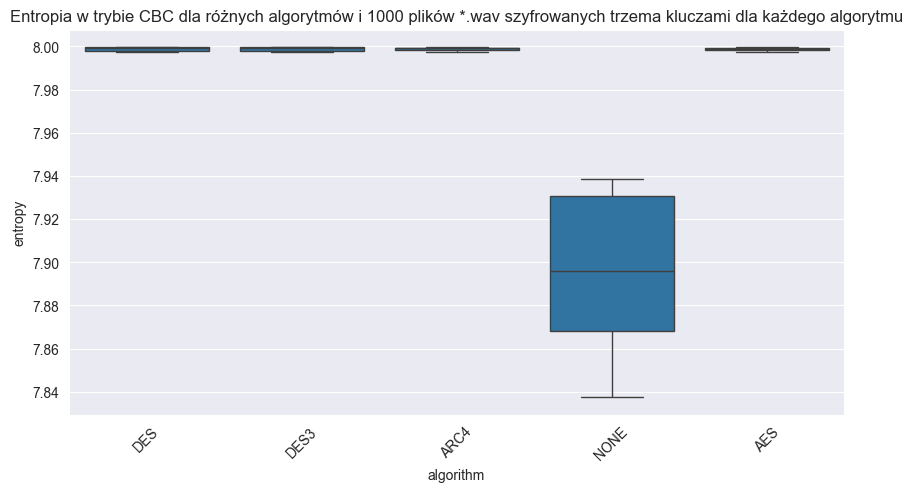

In [30]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1000_3keys["algorithm"].unique()):
    subset = df_wav_cbc_1000_3keys[df_wav_cbc_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1000_3keys["algorithm"], y=df_wav_cbc_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.wav szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (6 keys per algorithm)

In [10]:
df_all_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_all.csv'))
df_all_cbc_1000_6keys


,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.457811,125.117788,6004.353914,77.487766,0.023000,-1.285210,42131,10.063620,...,1,2,0,2,1,1,1,5,1,DES
1,file0280.py.enc,pyth_cbc,7.900738,129.473370,5517.060160,74.276915,-0.009668,-1.202889,195449,10.306419,...,9,11,4,7,8,10,8,7,6,DES
2,file0292.py.enc,pyth_cbc,7.970839,127.664924,5461.772230,73.903804,-0.011568,-1.208320,665495,10.268072,...,24,24,20,24,27,27,18,25,31,DES
3,file0392.py.enc,pyth_cbc,7.980570,128.539121,5389.724729,73.414745,-0.021827,-1.187214,1017957,10.250561,...,38,41,23,37,43,26,41,38,37,DES
4,file0302.py.enc,pyth_cbc,7.958628,129.039037,5446.386623,73.799638,-0.033335,-1.201518,526385,10.318404,...,19,18,15,24,23,12,14,17,26,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,image_0199.bmp.enc,bmp_cbc,7.996706,127.024501,5462.256600,73.907081,0.007654,-1.198189,5972393,10.278799,...,205,231,199,219,239,223,211,223,203,AES
5996,image_0093.bmp.enc,bmp_cbc,7.999263,127.389417,5467.314547,73.941291,0.004723,-1.199948,26150226,10.267622,...,987,934,934,1024,1010,1004,1008,944,1038,AES
5997,image_0083.bmp.enc,bmp_cbc,7.998860,127.648905,5461.966512,73.905118,-0.001441,-1.197939,16929353,10.259173,...,640,629,634,605,610,681,667,618,660,AES
5998,image_0152.bmp.enc,bmp_cbc,7.998983,127.767765,5474.298513,73.988503,-0.003154,-1.200806,18364691,10.256979,...,674,663,698,687,698,719,680,666,701,AES


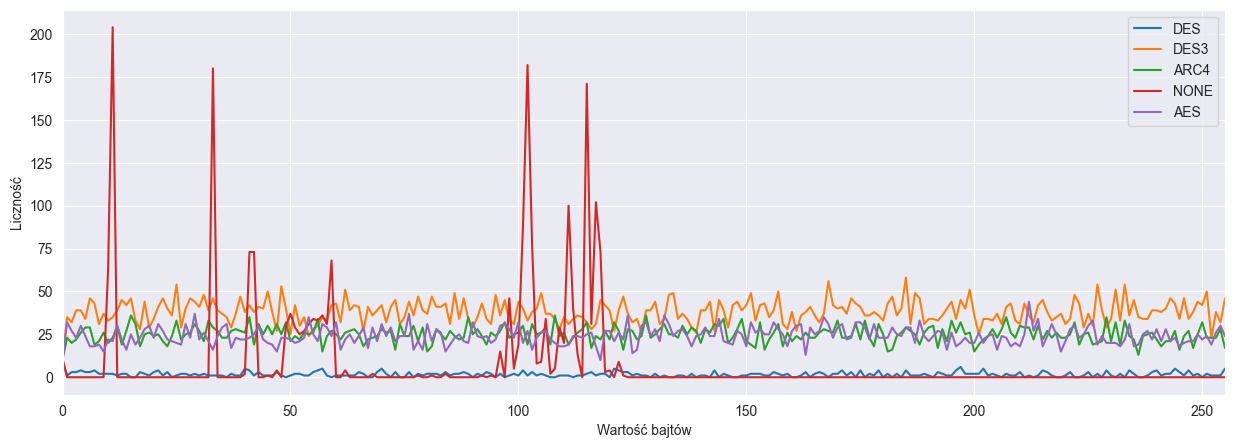

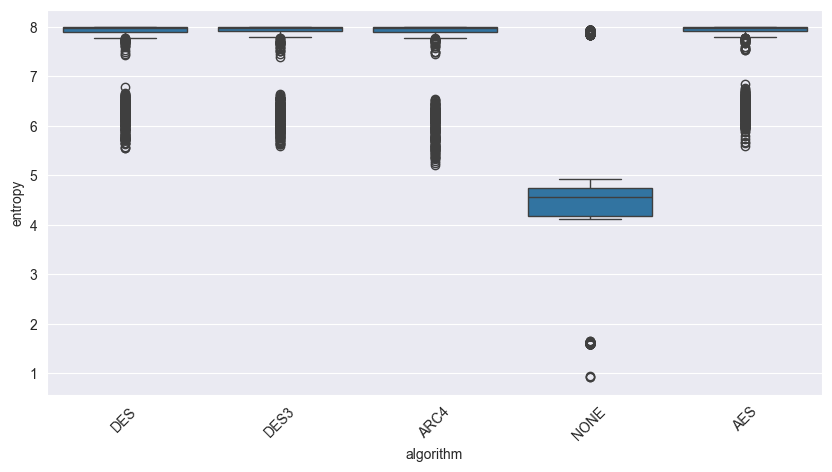

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_cbc_1000_6keys["algorithm"].unique()):
    subset = df_all_cbc_1000_6keys[df_all_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title(
    #"Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_cbc_1000_6keys["algorithm"], y=df_all_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
#plt.title(
    #"Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, sześć kluczy szyfrujących na algorytm")
plt.show()

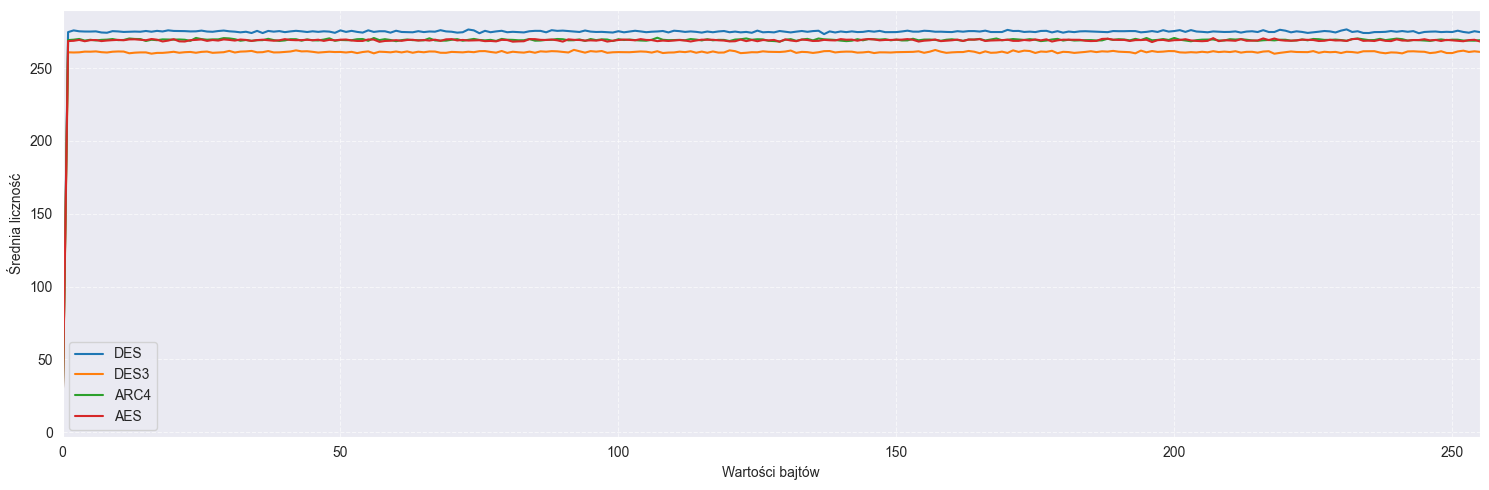

In [12]:
import matplotlib.pyplot as plt

algorithms = df_all_cbc_1000_6keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_cbc_1000_6keys[df_all_cbc_1000_6keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
df_bmp_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,image_0243.bmp.enc,bmp_cbc,7.999242,127.265646,5468.684669,73.950556,0.002664,-1.200826,20040590,10.274949,...,763,709,689,706,747,764,757,755,737,DES
1,image_0253.bmp.enc,bmp_cbc,7.999484,127.374935,5478.870511,74.019393,0.003452,-1.204860,30696320,10.267798,...,1108,1163,1166,1166,1128,1136,1141,1145,1131,DES
2,image_0382.bmp.enc,bmp_cbc,7.997126,127.799565,5485.815749,74.066293,-0.004977,-1.203401,6162299,10.268016,...,210,228,246,220,254,236,211,245,236,DES
3,image_0392.bmp.enc,bmp_cbc,7.997978,127.751948,5468.487364,73.949222,-0.002428,-1.206155,10128372,10.299872,...,369,365,370,367,378,368,382,397,368,DES
4,image_0298.bmp.enc,bmp_cbc,7.998709,127.556208,5441.364304,73.765604,-0.002036,-1.194947,17353999,10.261744,...,658,658,661,617,694,682,649,641,595,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,image_0199.bmp.enc,bmp_cbc,7.996706,127.024501,5462.256600,73.907081,0.007654,-1.198189,5972393,10.278799,...,205,231,199,219,239,223,211,223,203,AES
996,image_0093.bmp.enc,bmp_cbc,7.999263,127.389417,5467.314547,73.941291,0.004723,-1.199948,26150226,10.267622,...,987,934,934,1024,1010,1004,1008,944,1038,AES
997,image_0083.bmp.enc,bmp_cbc,7.998860,127.648905,5461.966512,73.905118,-0.001441,-1.197939,16929353,10.259173,...,640,629,634,605,610,681,667,618,660,AES
998,image_0152.bmp.enc,bmp_cbc,7.998983,127.767765,5474.298513,73.988503,-0.003154,-1.200806,18364691,10.256979,...,674,663,698,687,698,719,680,666,701,AES


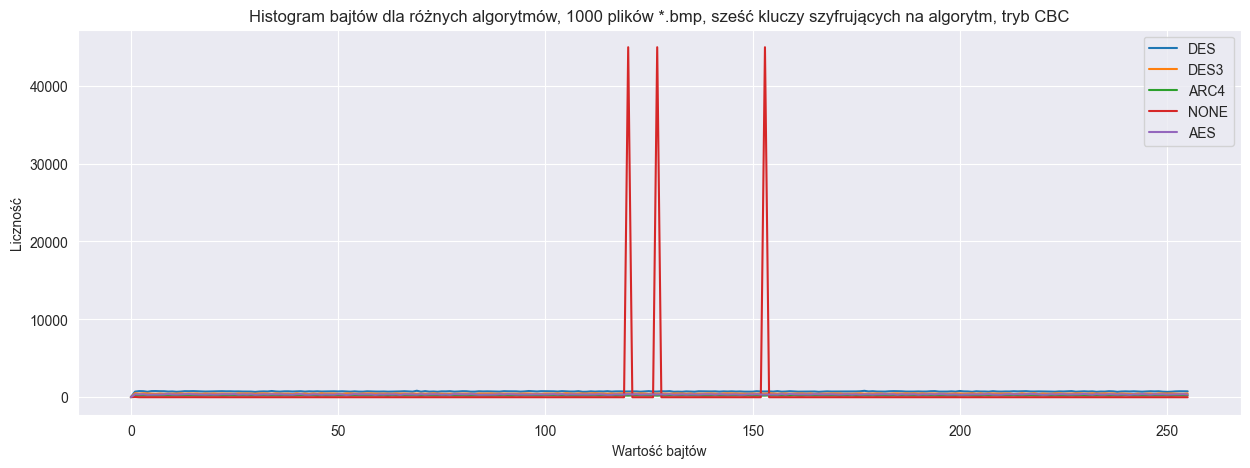

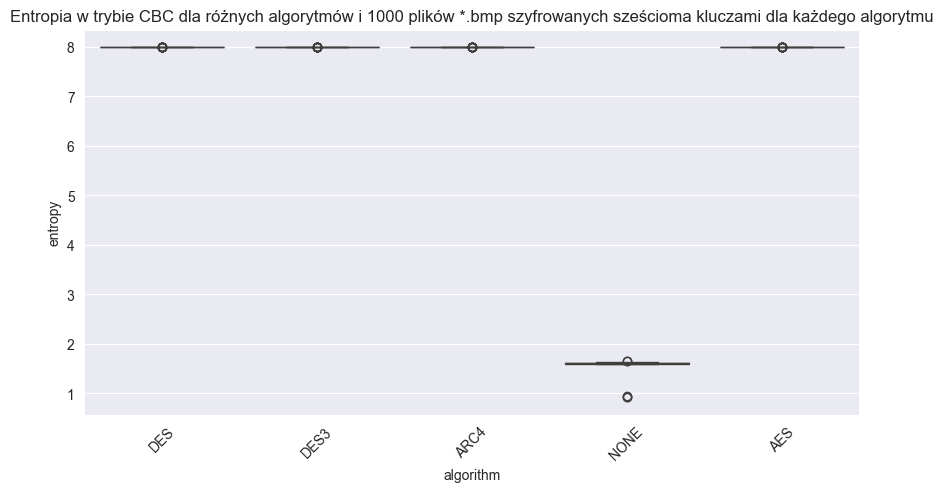

In [36]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1000_6keys["algorithm"].unique()):
    subset = df_bmp_cbc_1000_6keys[df_bmp_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1000_6keys["algorithm"], y=df_bmp_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.bmp szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [37]:
df_csv_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_csv_cbc.csv'))
df_csv_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0226.csv.enc,csv_cbc,6.796950,126.992647,5293.492593,72.756392,0.082472,-1.247109,14261,10.240132,...,2,0,0,0,0,0,0,0,0,DES
1,file0236.csv.enc,csv_cbc,6.347027,135.201923,4956.891919,70.405198,-0.178868,-1.234025,12239,10.848165,...,1,0,0,1,0,0,0,0,0,DES
2,file0385.csv.enc,csv_cbc,6.498394,123.258333,5346.424931,73.119251,-0.046445,-1.340896,11693,9.871255,...,1,0,0,0,0,0,0,0,0,DES
3,file0395.csv.enc,csv_cbc,6.241009,133.927083,5442.963433,73.776442,0.049214,-1.313180,10313,10.364704,...,0,1,1,0,0,0,1,1,1,DES
4,file0244.csv.enc,csv_cbc,5.996928,120.862500,5209.668594,72.178034,0.222678,-1.147323,8433,10.267059,...,0,0,0,0,1,0,0,2,0,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0145.csv.enc,csv_cbc,6.503830,130.703125,6198.958740,78.733466,-0.000222,-1.386479,14882,10.782654,...,2,0,2,1,0,0,1,0,0,AES
996,file0094.csv.enc,csv_cbc,6.529182,133.273438,5870.401794,76.618547,-0.043441,-1.217504,13851,10.402449,...,0,2,1,1,0,0,4,1,0,AES
997,file0084.csv.enc,csv_cbc,6.634727,117.976562,4521.304138,67.240643,0.010931,-1.062421,14051,10.477282,...,0,1,1,0,0,0,0,0,0,AES
998,file0137.csv.enc,csv_cbc,6.709754,133.000000,5542.527778,74.448155,-0.194238,-1.251709,16316,10.644508,...,1,1,1,0,1,1,0,0,1,AES


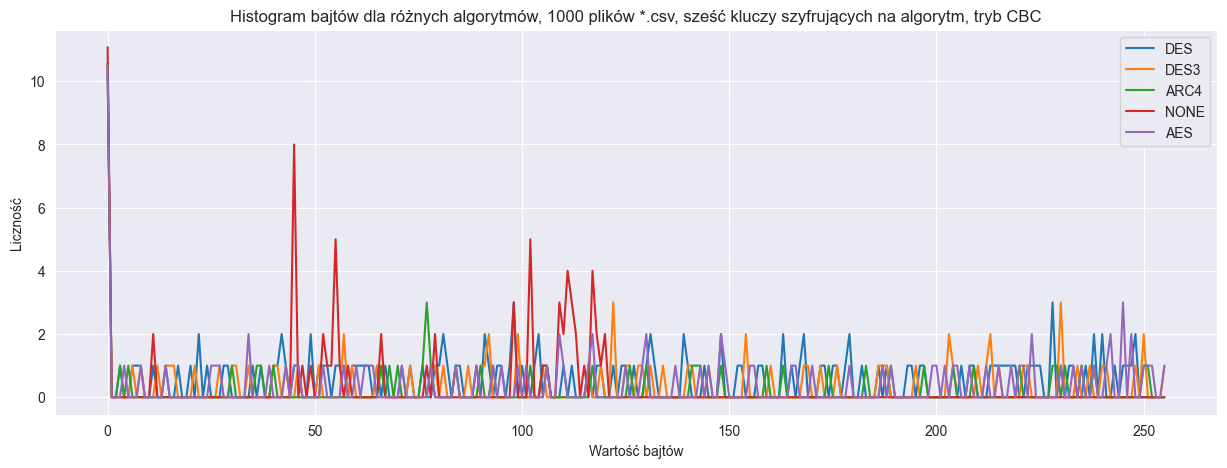

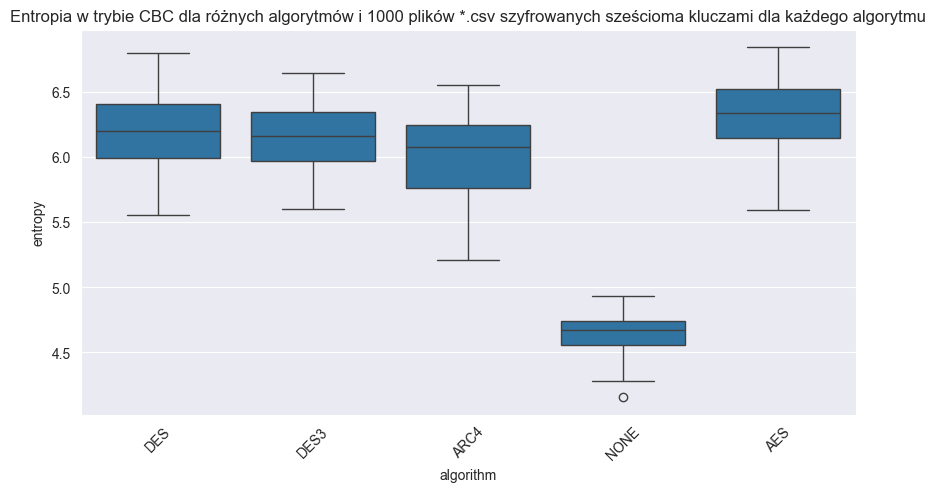

In [38]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1000_6keys["algorithm"].unique()):
    subset = df_csv_cbc_1000_6keys[df_csv_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1000_6keys["algorithm"], y=df_csv_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.csv szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [3]:
df_html_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_html_cbc.csv'))
df_html_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0320.html.enc,html_cbc,7.972645,126.297919,5434.709985,73.720486,0.016146,-1.202260,762554,10.217742,...,25,22,28,26,20,21,18,27,33,DES
1,file0321.html.enc,html_cbc,7.976059,129.119223,5500.958738,74.168448,-0.020743,-1.206332,801994,10.261766,...,34,33,30,35,34,31,28,32,31,DES
2,file0228.html.enc,html_cbc,7.968316,127.123106,5461.635097,73.902876,-0.003601,-1.199252,663680,10.234621,...,25,20,14,26,32,18,27,25,20,DES
3,file0229.html.enc,html_cbc,7.959447,125.500000,5465.850569,73.931391,0.028214,-1.200166,446632,10.292589,...,12,19,17,19,12,12,20,17,17,DES
4,file0369.html.enc,html_cbc,7.977522,127.328793,5435.875759,73.728392,-0.014880,-1.194391,1018122,10.328439,...,54,31,22,35,24,27,42,31,34,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0154.html.enc,html_cbc,7.982273,127.658750,5452.482491,73.840927,-0.007980,-1.192712,1098965,10.279577,...,37,42,35,43,34,39,49,41,49,AES
996,file0122.html.enc,html_cbc,7.966959,128.439375,5512.463825,74.245968,-0.026337,-1.200045,676460,10.280899,...,20,26,24,27,31,21,25,22,29,AES
997,file0123.html.enc,html_cbc,7.938566,128.903947,5453.373669,73.846961,-0.039329,-1.170423,319364,10.249583,...,12,13,16,25,10,16,11,9,14,AES
998,file0063.html.enc,html_cbc,7.952427,126.271939,5487.031662,74.074501,0.034092,-1.209459,410598,10.234471,...,17,15,15,19,17,13,16,20,24,AES


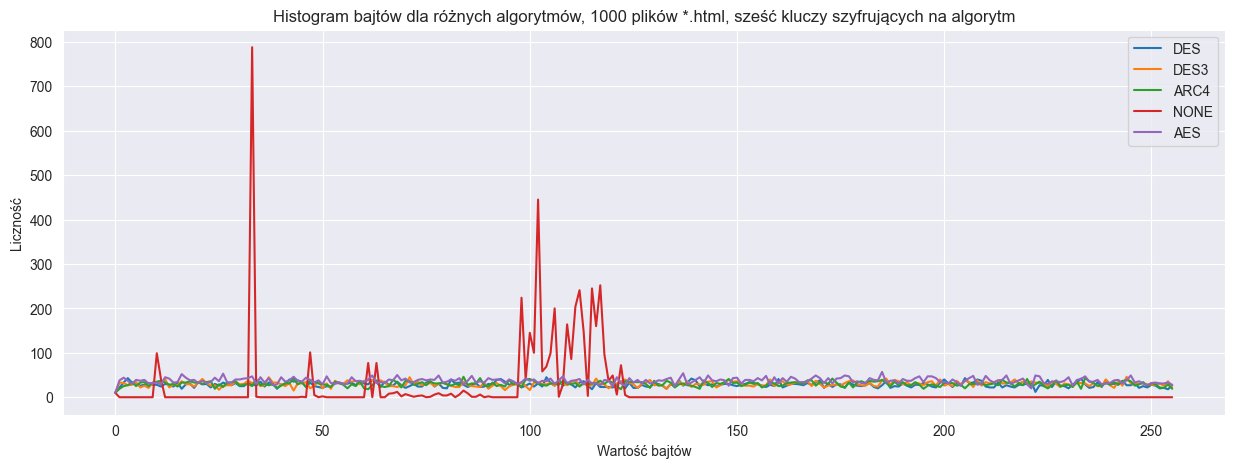

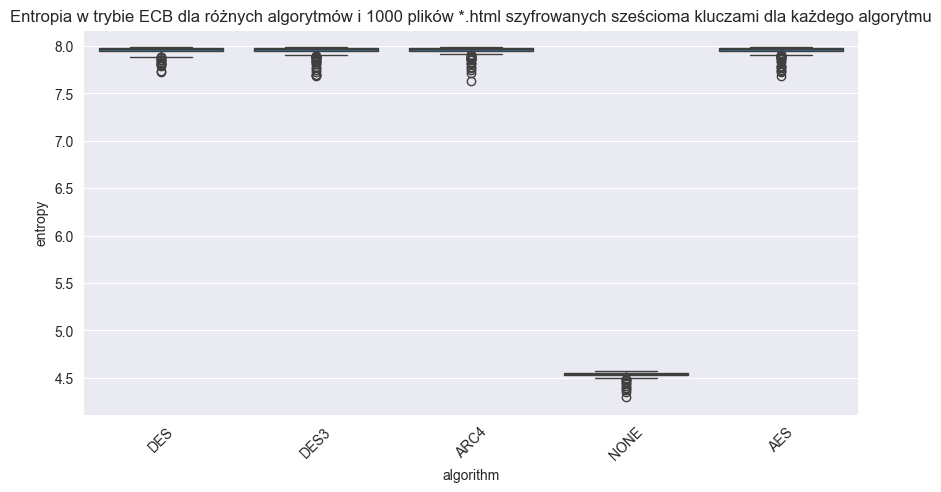

In [8]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_cbc_1000_6keys["algorithm"].unique()):
    subset = df_html_cbc_1000_6keys[df_html_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_cbc_1000_6keys["algorithm"], y=df_html_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.html szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [9]:
df_pyth_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0380.py.enc,pyth_cbc,7.457811,125.117788,6004.353914,77.487766,0.023000,-1.285210,42131,10.063620,...,1,2,0,2,1,1,1,5,1,DES
1,file0280.py.enc,pyth_cbc,7.900738,129.473370,5517.060160,74.276915,-0.009668,-1.202889,195449,10.306419,...,9,11,4,7,8,10,8,7,6,DES
2,file0292.py.enc,pyth_cbc,7.970839,127.664924,5461.772230,73.903804,-0.011568,-1.208320,665495,10.268072,...,24,24,20,24,27,27,18,25,31,DES
3,file0392.py.enc,pyth_cbc,7.980570,128.539121,5389.724729,73.414745,-0.021827,-1.187214,1017957,10.250561,...,38,41,23,37,43,26,41,38,37,DES
4,file0302.py.enc,pyth_cbc,7.958628,129.039037,5446.386623,73.799638,-0.033335,-1.201518,526385,10.318404,...,19,18,15,24,23,12,14,17,26,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0075.py.enc,pyth_cbc,7.980215,126.549090,5335.071105,73.041571,0.021322,-1.167803,883552,10.285391,...,34,30,31,29,36,29,24,30,38,AES
996,file0108.py.enc,pyth_cbc,7.952733,126.409305,5525.951361,74.336743,-0.000666,-1.200693,454402,10.332831,...,16,11,15,11,17,13,16,17,13,AES
997,file0008.py.enc,pyth_cbc,7.975589,127.184957,5467.069913,73.939637,-0.007660,-1.213537,786046,10.256650,...,30,27,23,36,24,33,23,33,30,AES
998,file0116.py.enc,pyth_cbc,7.906521,128.996454,5412.162221,73.567399,-0.022561,-1.199949,238190,10.275246,...,6,10,11,9,14,5,10,10,9,AES


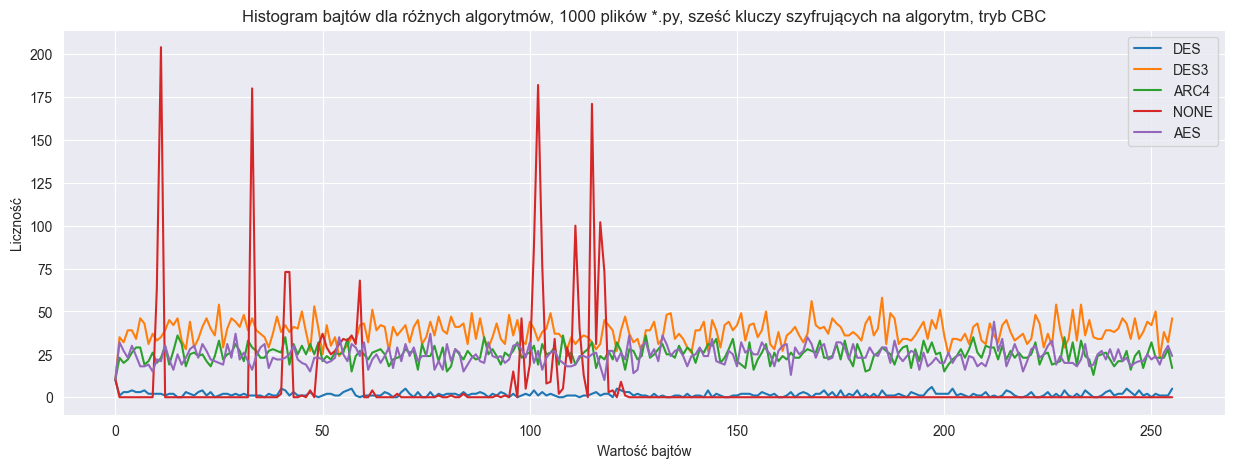

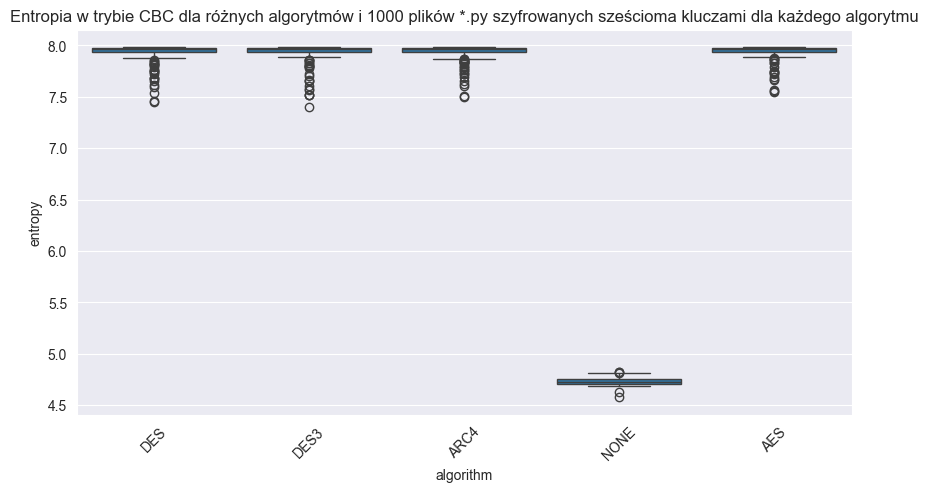

In [10]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1000_6keys["algorithm"].unique()):
    subset = df_pyth_cbc_1000_6keys[df_pyth_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1000_6keys["algorithm"], y=df_pyth_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.py szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [11]:
df_txt_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_txt_cbc.csv'))
df_txt_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0298.txt.enc,txt_cbc,7.940731,125.713816,5459.875993,73.890974,0.036511,-1.201392,326424,10.362254,...,11,12,9,14,15,12,10,10,10,DES
1,file0288.txt.enc,txt_cbc,7.977198,125.366534,5318.196828,72.925968,0.040342,-1.178220,850948,10.292945,...,34,26,32,23,32,33,20,19,36,DES
2,file0221.txt.enc,txt_cbc,7.974308,127.071211,5462.334669,73.907609,0.015665,-1.199961,760659,10.255711,...,33,33,39,28,29,33,29,35,31,DES
3,file0359.txt.enc,txt_cbc,7.965401,128.097863,5546.682587,74.476054,-0.006337,-1.214525,619073,10.246893,...,28,22,30,22,32,18,29,33,23,DES
4,file0231.txt.enc,txt_cbc,7.927151,129.055898,5675.146963,75.333571,-0.016072,-1.244231,242643,10.334268,...,15,9,8,11,12,7,4,9,10,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0048.txt.enc,txt_cbc,7.840364,125.716176,5526.040032,74.337339,0.022361,-1.204158,144332,10.301770,...,4,3,5,4,8,8,3,5,6,AES
996,file0120.txt.enc,txt_cbc,7.807647,126.766129,5516.191272,74.271066,0.016155,-1.218460,106788,10.375413,...,6,6,4,2,4,7,3,5,4,AES
997,file0058.txt.enc,txt_cbc,7.932463,126.178267,5418.604584,73.611172,0.030468,-1.207989,301352,10.344767,...,5,16,14,11,11,7,10,10,13,AES
998,file0189.txt.enc,txt_cbc,7.957073,126.820196,5465.528072,73.929210,0.015344,-1.182927,449001,10.232842,...,13,16,11,14,17,20,14,18,21,AES


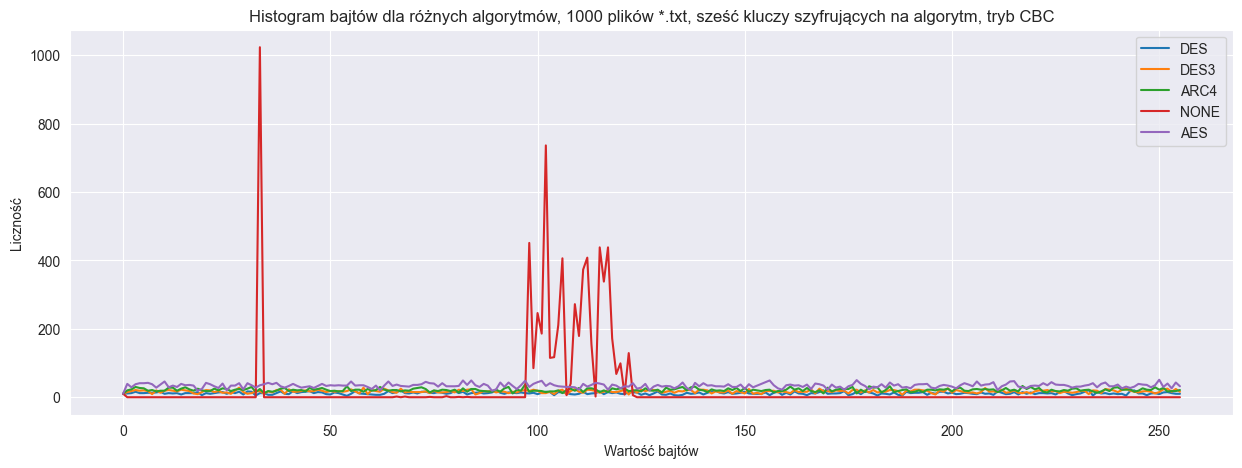

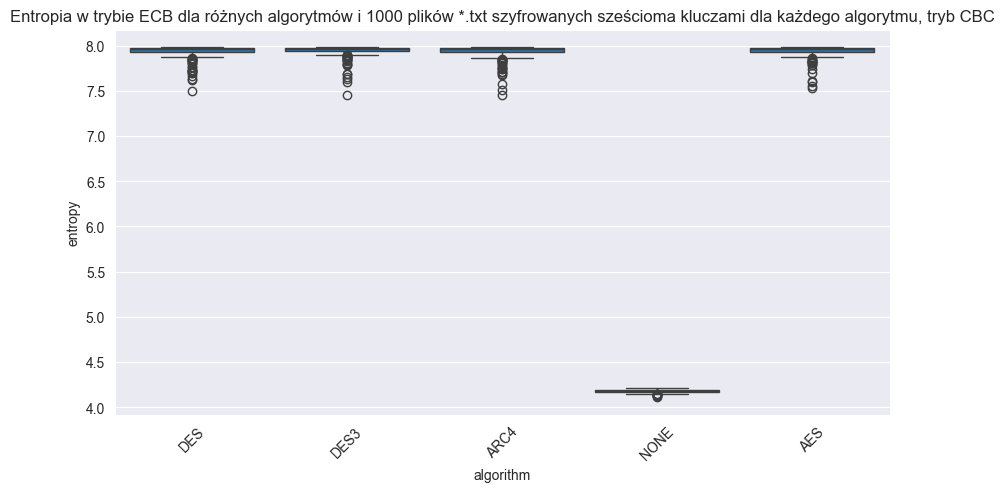

In [12]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1000_6keys["algorithm"].unique()):
    subset = df_txt_cbc_1000_6keys[df_txt_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1000_6keys["algorithm"], y=df_txt_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.txt szyfrowanych sześcioma kluczami dla każdego algorytmu, tryb CBC")
plt.show()

In [13]:
df_wav_cbc_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1000/features_cbc_1000_6keys_csv/features_wav_cbc.csv'))
df_wav_cbc_1000_6keys

,file_name,format,entropy,mean,variance,std_dev,skewness,kurtosis,energy,rms,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,algorithm
0,file0214.wav.enc,wav_cbc,7.999515,127.383921,5468.569636,73.949778,0.000798,-1.200074,37255407,10.275333,...,1381,1340,1350,1345,1369,1324,1415,1377,1474,DES
1,file0204.wav.enc,wav_cbc,7.997731,127.486041,5459.795513,73.890429,-0.001005,-1.199699,9315218,10.273641,...,309,393,340,322,344,350,334,330,325,DES
2,file0276.wav.enc,wav_cbc,7.999629,127.509486,5456.124497,73.865584,-0.001354,-1.198295,46476038,10.265206,...,1724,1706,1709,1744,1646,1682,1765,1712,1757,DES
3,file0266.wav.enc,wav_cbc,7.999093,127.503429,5445.841773,73.795947,0.000963,-1.197961,18620823,10.272620,...,694,726,703,698,673,670,649,692,684,DES
4,file0353.wav.enc,wav_cbc,7.997979,127.614372,5478.091161,74.014128,-0.000602,-1.203737,9317682,10.275000,...,336,347,349,371,369,332,323,310,325,DES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,file0052.wav.enc,wav_cbc,7.999327,127.414275,5459.492931,73.888382,0.000648,-1.200412,27925747,10.271844,...,1006,1074,1007,1040,1017,1041,1086,1019,1021,AES
996,file0167.wav.enc,wav_cbc,7.999019,127.566631,5456.806729,73.870202,-0.001057,-1.201202,18652044,10.280995,...,645,685,711,713,682,656,730,703,659,AES
997,file0177.wav.enc,wav_cbc,7.999362,127.653231,5463.253225,73.913823,-0.004456,-1.200371,27961408,10.278400,...,1021,1092,1002,999,1044,1021,1032,1019,1040,AES
998,file0105.wav.enc,wav_cbc,7.998958,127.579824,5444.885674,73.789469,0.000807,-1.193749,18589556,10.263759,...,682,672,754,703,672,666,709,646,697,AES


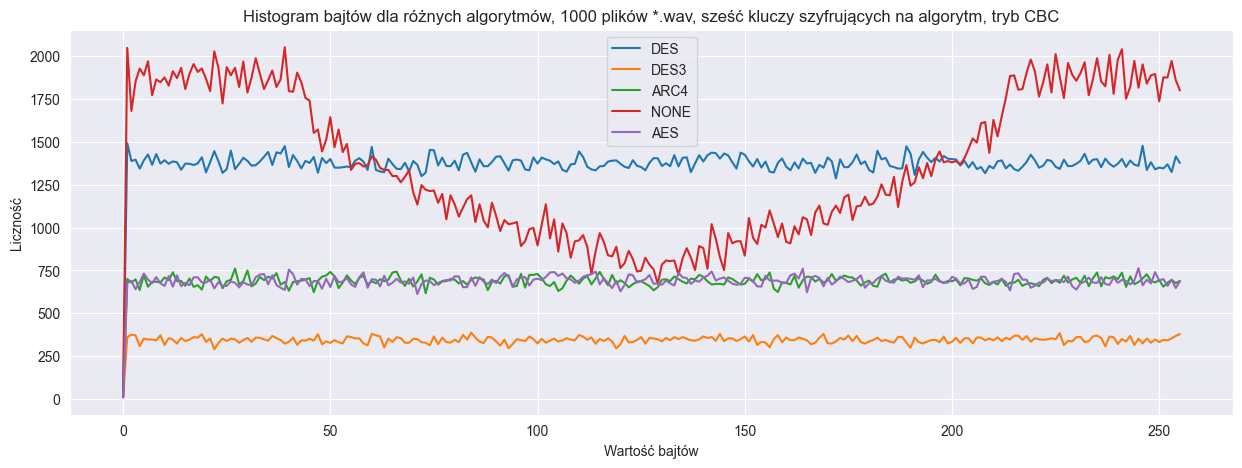

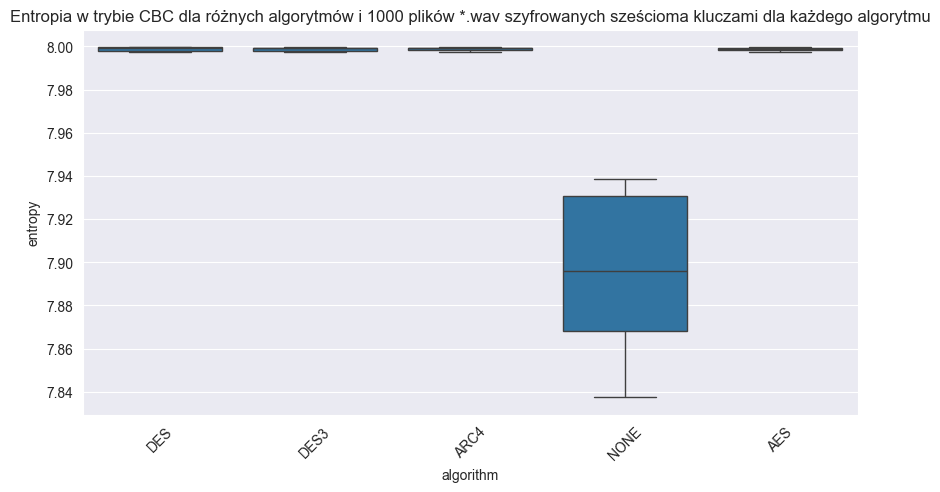

In [14]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1000_6keys["algorithm"].unique()):
    subset = df_wav_cbc_1000_6keys[df_wav_cbc_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1000_6keys["algorithm"], y=df_wav_cbc_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1000 plików *.wav szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()